In [1]:
import pandas as pd


In [6]:
df = pd.read_csv('../data/ipdr_synthetic_4 (7-10%).csv')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78086 entries, 0 to 78085
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   event_id        78086 non-null  object 
 1   user_id         78086 non-null  object 
 2   imsi            78086 non-null  object 
 3   imei            78086 non-null  object 
 4   timestamp       78086 non-null  object 
 5   domain          78086 non-null  object 
 6   ip_src          78086 non-null  object 
 7   ip_dst          78086 non-null  object 
 8   port            78086 non-null  int64  
 9   protocol        78086 non-null  object 
 10  duration        78086 non-null  float64
 11  bytes_sent      78086 non-null  int64  
 12  bytes_received  78086 non-null  int64  
 13  vpn_usage       78086 non-null  bool   
 14  cell_id         78086 non-null  object 
 15  location_lat    78086 non-null  float64
 16  location_lon    78086 non-null  float64
 17  is_fraud        78086 non-null 

--- Initial Data Inspection ---
First 5 rows of the dataset:
             SrcIP         DstIP  SrcPort  DstPort            Timestamp  \
0   192.168.63.192    10.0.201.1     5385      443  2023-11-12 08:18:22   
1  192.168.141.215  10.0.101.136     4365       53  2023-09-01 22:26:05   
2  192.168.243.223  10.0.198.160     8851      443  2023-03-12 08:01:06   
3    192.168.21.35   10.0.142.55    36969       22  2023-04-15 05:48:09   
4  192.168.216.104    10.0.20.30     1669       80  2023-05-12 02:42:53   

  Protocol  DataVolume  FraudType  
0      UDP     8305754       DDoS  
1      UDP     9987103        NaN  
2      TCP     6062294        NaN  
3      TCP     1608877  Espionage  
4      UDP     4767985       DDoS  

Dataset Information (Data Types and Nulls):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SrcIP       2000 non-null   object
 

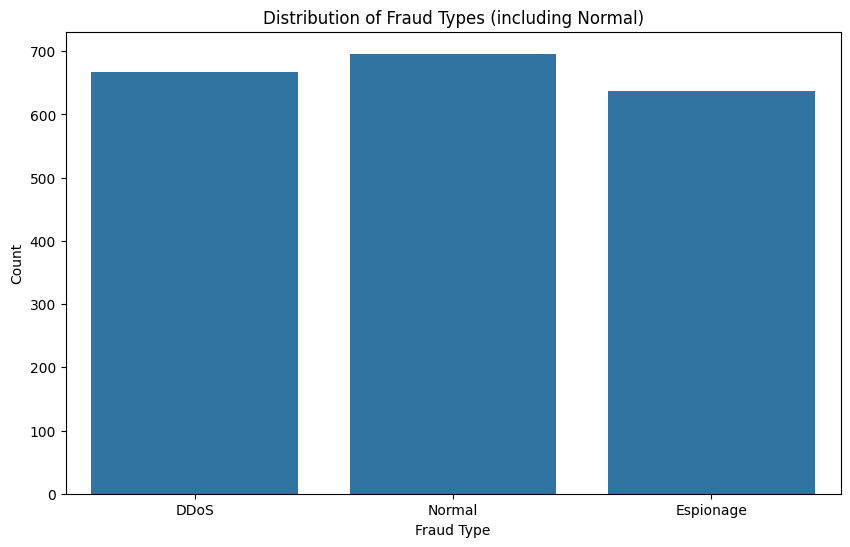


--- Feature Analysis ---


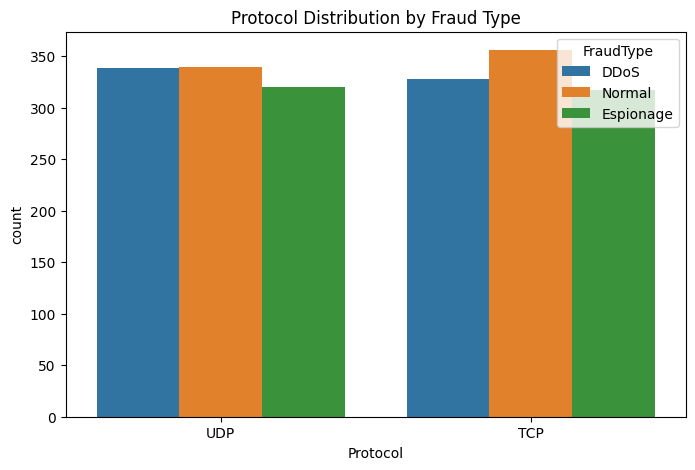

Top 10 most frequent Source IPs:
SrcIP
192.168.28.208     2
192.168.206.16     2
192.168.16.236     2
192.168.42.42      2
192.168.193.170    2
192.168.176.208    2
192.168.67.3       2
192.168.107.180    2
192.168.196.47     2
192.168.98.87      2
Name: count, dtype: int64

Top 10 most frequent Destination IPs:
DstIP
10.0.62.246     2
10.0.104.5      2
10.0.44.219     2
10.0.208.142    2
10.0.34.116     2
10.0.40.140     2
10.0.227.1      2
10.0.44.18      2
10.0.83.162     2
10.0.189.153    2
Name: count, dtype: int64

Histograms of Numerical Features:


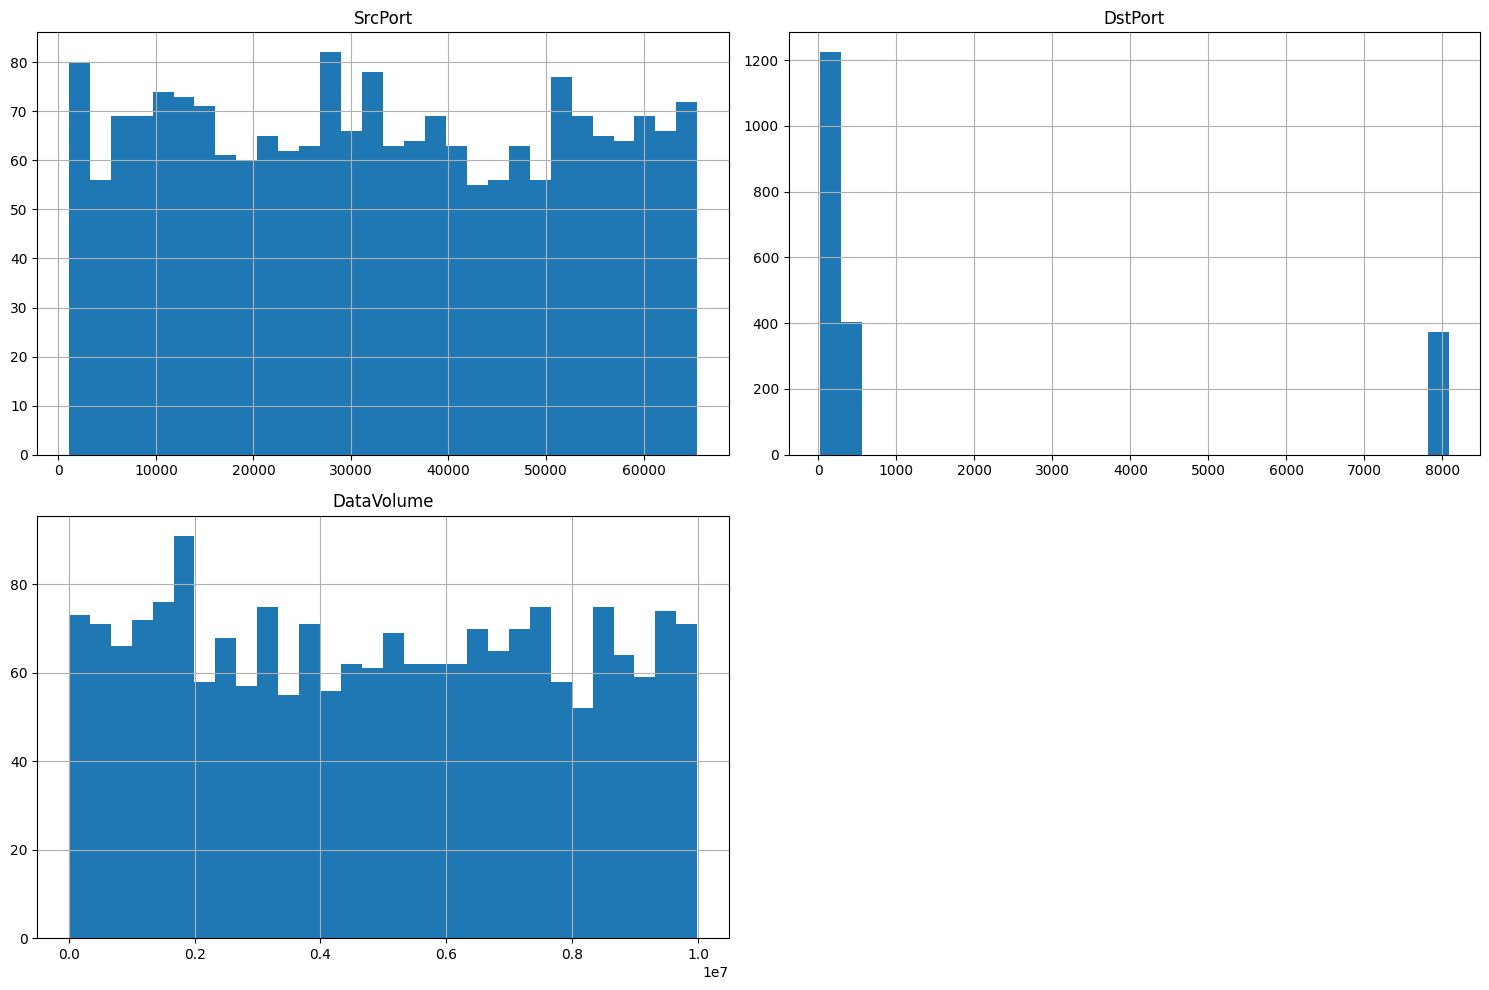

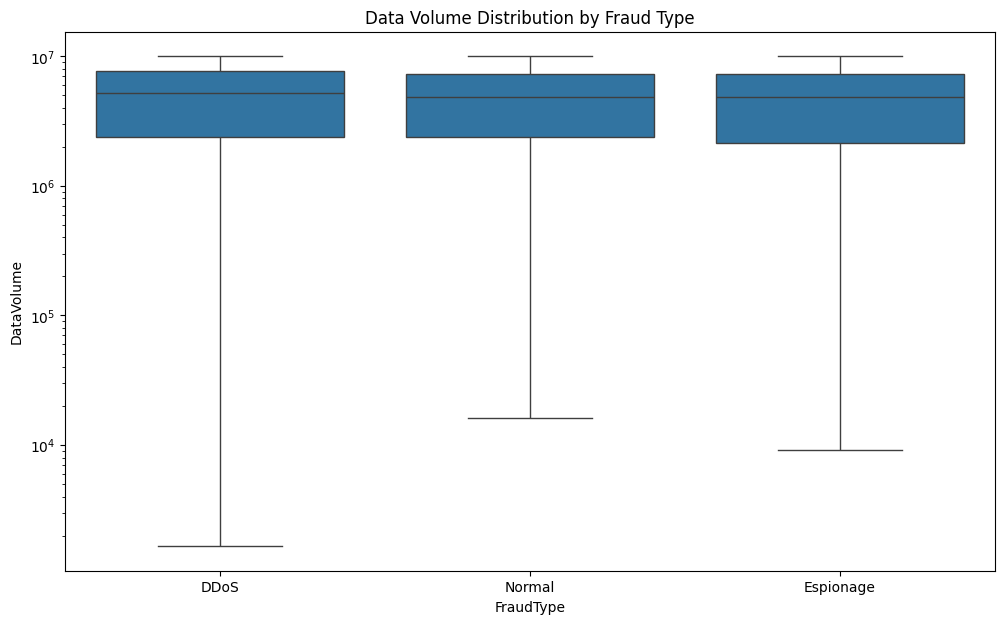


--- Temporal Analysis ---


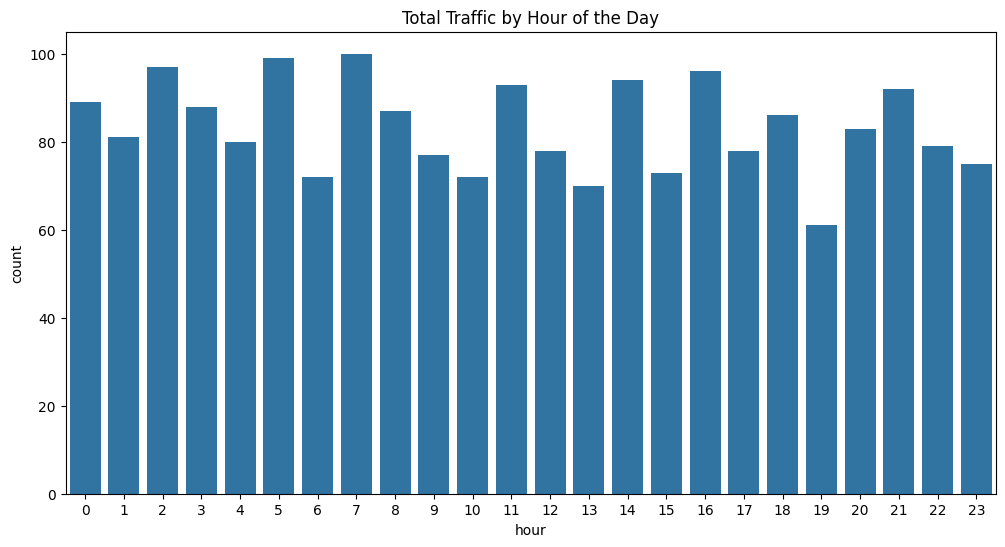

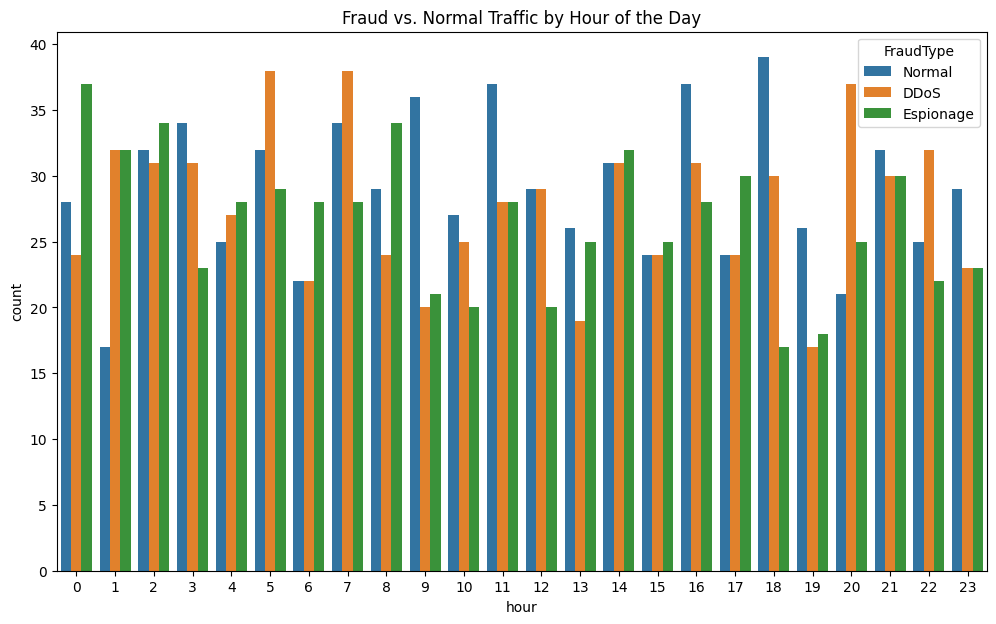

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# import warnings

# # --- Configuration ---
# # Set plotting style and suppress warnings for a cleaner output
# sns.set_style('whitegrid')
# warnings.filterwarnings('ignore')
# pd.options.display.float_format = '{:,.2f}'.format

# # --- 1. Data Loading and Initial Preparation ---

# def load_and_prepare_data(filepath):
#     """
#     Loads data, performs initial cleaning, and engineers new features.
#     """
#     print("--- 1. Loading and Preparing Data ---")
#     try:
#         df = pd.read_csv(filepath)
#         print(f"Successfully loaded {filepath}. Shape: {df.shape}")
#     except FileNotFoundError:
#         print(f"Error: File not found at {filepath}. Please check the path.")
#         return None

#     # --- Data Cleaning and Type Conversion ---
#     # Convert timestamp to datetime for time-series analysis
#     df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
#     df.dropna(subset=['timestamp'], inplace=True) # Drop rows if timestamp is invalid

#     # --- Feature Engineering ---
#     # Create a combined 'total_bytes' feature
#     df['total_bytes'] = df['bytes_sent'] + df['bytes_received']

#     # Extract hour and day of the week from timestamp
#     df['hour_of_day'] = df['timestamp'].dt.hour
#     df['day_of_week'] = df['timestamp'].dt.day_name()

#     # Extract Top-Level Domain (TLD) from the domain name
#     df['tld'] = df['domain'].apply(lambda x: str(x).split('.')[-1] if '.' in str(x) else 'unknown')

#     # Create a user-friendly label for fraud status for plotting
#     df['fraud_status'] = df['is_fraud'].apply(lambda x: 'Fraud' if x == 1 else 'Normal')

#     print("Data preparation complete. New features created: 'total_bytes', 'hour_of_day', 'day_of_week', 'tld', 'fraud_status'.\n")
#     return df

# # --- 2. High-Level Overview ---

# def high_level_overview(df):
#     """
#     Provides a high-level summary of the dataset.
#     """
#     print("--- 2. High-Level Dataset Overview ---")
#     print("\n[-- Dataset Info --]")
#     df.info()

#     print("\n[-- Missing Values --]")
#     missing_vals = df.isnull().sum()
#     print(missing_vals[missing_vals > 0])

#     print("\n[-- Numerical Summary --]")
#     print(df.describe())

#     print("\n[-- Categorical Summary --]")
#     print(df.describe(include=['object', 'bool']))
#     print("\n")


# # --- 3. Target Variable Analysis ---

# def analyze_target_variable(df):
#     """
#     Analyzes the distribution of the target variable 'is_fraud' and 'anomaly_type'.
#     """
#     print("--- 3. Target Variable Analysis ---")
#     fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#     # Plot 1: Overall Fraud Distribution
#     ax1 = sns.countplot(x='fraud_status', data=df, ax=axes[0], palette={'Normal':'skyblue', 'Fraud':'salmon'})
#     ax1.set_title('Overall Distribution of Fraud vs. Normal Events', fontsize=14)
#     ax1.set_xlabel('Event Type')
#     ax1.set_ylabel('Count')
#     for p in ax1.patches:
#         ax1.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                      ha='center', va='center', xytext=(0, 9), textcoords='offset points')

#     # Plot 2: Breakdown of Anomaly Types for Fraudulent Events
#     fraud_df = df[df['is_fraud'] == 1]
#     ax2 = sns.countplot(y='anomaly_type', data=fraud_df, order=fraud_df['anomaly_type'].value_counts().index, ax=axes[1], palette='viridis')
#     ax2.set_title('Breakdown of Anomaly Types (for Fraud Events)', fontsize=14)
#     ax2.set_xlabel('Count')
#     ax2.set_ylabel('Anomaly Type')

#     plt.tight_layout()
#     plt.show()
#     print("\n")


# # --- 4. Univariate and Bivariate Analysis ---

# def detailed_feature_analysis(df):
#     """
#     Performs detailed analysis of individual features and their relationship with fraud.
#     """
#     print("--- 4. Detailed Feature Analysis ---")

#     # --- Numerical Features vs. Fraud ---
#     numerical_features = ['duration', 'total_bytes', 'port']
#     fig, axes = plt.subplots(len(numerical_features), 2, figsize=(16, 12))
#     fig.suptitle('Numerical Feature Distributions by Fraud Status', fontsize=16, y=1.02)

#     for i, col in enumerate(numerical_features):
#         sns.histplot(data=df, x=col, hue='fraud_status', kde=True, ax=axes[i, 0], palette={'Normal':'skyblue', 'Fraud':'salmon'})
#         axes[i, 0].set_title(f'Distribution of {col}')
#         axes[i, 0].set_yscale('log') # Log scale is often useful for skewed data

#         sns.boxplot(data=df, x='fraud_status', y=col, ax=axes[i, 1], palette={'Normal':'skyblue', 'Fraud':'salmon'})
#         axes[i, 1].set_title(f'Boxplot of {col}')
#         axes[i, 1].set_yscale('log')

#     plt.tight_layout()
#     plt.show()

#     # --- Categorical Features vs. Fraud ---
#     categorical_features = ['protocol', 'vpn_usage', 'day_of_week']
#     fig, axes = plt.subplots(1, len(categorical_features), figsize=(20, 5))
#     fig.suptitle('Categorical Feature Distributions by Fraud Status', fontsize=16)

#     for i, col in enumerate(categorical_features):
#         sns.countplot(data=df, x=col, hue='fraud_status', ax=axes[i], palette={'Normal':'skyblue', 'Fraud':'salmon'})
#         axes[i].set_title(f'Count of {col}')
#         if col == 'day_of_week':
#             axes[i].tick_params(axis='x', rotation=45)

#     plt.tight_layout()
#     plt.show()

#     # --- Analysis of Engineered TLD Feature ---
#     plt.figure(figsize=(15, 6))
#     top_tlds = df['tld'].value_counts().nlargest(15).index
#     sns.countplot(data=df[df['tld'].isin(top_tlds)], x='tld', hue='fraud_status', order=top_tlds, palette={'Normal':'skyblue', 'Fraud':'salmon'})
#     plt.title('Top 15 Top-Level Domains (TLDs) by Fraud Status', fontsize=14)
#     plt.xticks(rotation=45)
#     plt.show()
#     print("\n")


# # --- 5. Correlation and Geospatial Analysis ---

# def advanced_analysis(df):
#     """
#     Performs correlation, temporal, and geospatial analysis.
#     """
#     print("--- 5. Advanced Analysis: Correlation, Time, and Space ---")

#     # --- Correlation Heatmap ---
#     plt.figure(figsize=(12, 8))
#     numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool'])
#     corr = numeric_df.corr()
#     sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
#     plt.title('Correlation Matrix of Numerical Features', fontsize=14)
#     plt.show()

#     # --- Temporal Analysis: Fraud by Hour ---
#     plt.figure(figsize=(14, 6))
#     sns.countplot(data=df, x='hour_of_day', hue='fraud_status', palette={'Normal':'skyblue', 'Fraud':'salmon'})
#     plt.title('Event Count by Hour of the Day', fontsize=14)
#     plt.show()

#     # --- Geospatial Analysis (Interactive Map) ---
#     print("\nGenerating interactive map of event locations. This may take a moment...")
#     # To avoid plotting too many points, we'll sample the normal events
#     fraud_locations = df[df['is_fraud'] == 1]
#     normal_locations = df[df['is_fraud'] == 0].sample(n=min(5000, len(df[df['is_fraud']==0])), random_state=42)
#     map_df = pd.concat([fraud_locations, normal_locations])

#     fig = px.scatter_geo(map_df,
#                          lat='location_lat',
#                          lon='location_lon',
#                          color='fraud_status',
#                          color_discrete_map={'Normal': 'blue', 'Fraud': 'red'},
#                          hover_name='user_id',
#                          hover_data=['anomaly_type', 'domain'],
#                          title='Geospatial Distribution of Normal vs. Fraudulent Events',
#                          projection='natural earth')
#     fig.show()
#     print("\n")





In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# --- Configuration ---
# Set plotting style and suppress warnings for a cleaner output
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

print("Libraries imported and settings configured.")


Libraries imported and settings configured.


In [10]:
# --- 1. Data Loading and Initial Preparation ---

def load_and_prepare_data(filepath):
    """
    Loads data, performs initial cleaning, and engineers new features.
    """
    print("--- 1. Loading and Preparing Data ---")
    try:
        df = pd.read_csv(filepath)
        print(f"Successfully loaded {filepath}. Shape: {df.shape}")
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}. Please check the path.")
        return None

    # --- Data Cleaning and Type Conversion ---
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df.dropna(subset=['timestamp'], inplace=True)

    # --- Feature Engineering ---
    df['total_bytes'] = df['bytes_sent'] + df['bytes_received']
    df['hour_of_day'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.day_name()
    df['tld'] = df['domain'].apply(lambda x: str(x).split('.')[-1] if '.' in str(x) else 'unknown')
    df['fraud_status'] = df['is_fraud'].apply(lambda x: 'Fraud' if x == 1 else 'Normal')

    print("Data preparation complete. New features created: 'total_bytes', 'hour_of_day', 'day_of_week', 'tld', 'fraud_status'.\n")
    return df

# --- Main Execution ---
# IMPORTANT: Replace with the actual path to your dataset

FILEPATH = '../data/ipdr_synthetic_4 (7-10%).csv'
df = load_and_prepare_data(FILEPATH)

# Display the first few rows with new features
if df is not None:
    display(df.head())


--- 1. Loading and Preparing Data ---
Successfully loaded ../data/ipdr_synthetic_4 (7-10%).csv. Shape: (78086, 20)
Data preparation complete. New features created: 'total_bytes', 'hour_of_day', 'day_of_week', 'tld', 'fraud_status'.



,event_id,user_id,imsi,imei,timestamp,domain,ip_src,ip_dst,port,protocol,...,location_lat,location_lon,is_fraud,anomaly_type,runbook_id,total_bytes,hour_of_day,day_of_week,tld,fraud_status
0,c012b2fad7b875eb,9189844258334d45,81e804a659d400f2,b5b7b201ccf927b4,2025-09-01 00:00:00.593934,site477.example,10.0.128.105,10.0.99.84,80,TCP,...,30.71,76.76,0,NaN,NaN,175774,0,Monday,example,Normal
1,db0c150879b18219,649090a0f91222a8,06b84c677d69e0e9,a56ee01016243344,2025-09-01 00:00:00.790089,site50.example,10.3.27.6,10.0.137.127,5228,TCP,...,30.79,76.84,0,NaN,NaN,5838,0,Monday,example,Normal
2,054ceb1e5c396812,7bfa9ce984b2f6a6,e0ab3ddc53a44b21,9cd50e2a80916749,2025-09-01 00:00:02.272500,google.com,10.2.43.249,10.0.59.238,5060,TCP,...,30.71,76.76,0,NaN,NaN,75207,0,Monday,com,Normal
3,d253bd207a1633e4,7ede5a91e236cc8b,f946b11e563b154a,536820633c32cb96,2025-09-01 00:00:05.204634,site747.example,10.2.147.15,10.0.127.218,443,TCP,...,30.72,76.77,0,NaN,NaN,48187,0,Monday,example,Normal
4,f249541656cfc819,31e6b343b1b4cefc,f3858a1172dca418,cf84ba574306c945,2025-09-01 00:00:05.573124,site85.example,10.1.23.4,10.0.173.215,80,TCP,...,30.77,76.82,0,NaN,NaN,6293,0,Monday,example,Normal


In [11]:
# --- 2. High-Level Dataset Overview ---

if df is not None:
    print("[-- Dataset Info --]")
    df.info()

    print("\n[-- Missing Values --]")
    missing_vals = df.isnull().sum()
    print(missing_vals[missing_vals > 0])

    print("\n[-- Numerical Summary --]")
    display(df.describe())

    print("\n[-- Categorical Summary --]")
    display(df.describe(include=['object', 'bool']))


[-- Dataset Info --]
<class 'pandas.core.frame.DataFrame'>
Index: 76886 entries, 0 to 78085
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        76886 non-null  object        
 1   user_id         76886 non-null  object        
 2   imsi            76886 non-null  object        
 3   imei            76886 non-null  object        
 4   timestamp       76886 non-null  datetime64[ns]
 5   domain          76886 non-null  object        
 6   ip_src          76886 non-null  object        
 7   ip_dst          76886 non-null  object        
 8   port            76886 non-null  int64         
 9   protocol        76886 non-null  object        
 10  duration        76886 non-null  float64       
 11  bytes_sent      76886 non-null  int64         
 12  bytes_received  76886 non-null  int64         
 13  vpn_usage       76886 non-null  bool          
 14  cell_id         76886 non-null  object

,timestamp,port,duration,bytes_sent,bytes_received,location_lat,location_lon,is_fraud,total_bytes,hour_of_day
count,76886,"76,886.00","76,886.00","76,886.00","76,886.00","76,886.00","76,886.00","76,886.00","76,886.00","76,886.00"
mean,2025-09-04 13:03:34.434841600,"2,402.01",52.68,"48,310.27","44,603.51",30.75,76.80,0.07,"92,913.78",12.48
min,2025-09-01 00:00:00.593934,80.00,1.00,20.00,17.00,30.70,76.75,0.00,133.00,0.00
25%,2025-09-02 19:05:57.281980672,80.00,15.13,"7,576.00","6,263.00",30.73,76.78,0.00,"15,480.25",5.00
50%,2025-09-04 14:52:52.480380416,443.00,31.27,"18,695.00","16,922.00",30.75,76.80,0.00,"37,757.50",14.00
75%,2025-09-06 05:21:12.992236544,"5,228.00",62.68,"45,337.50","44,565.00",30.78,76.83,0.00,"92,125.00",19.00
max,2025-09-07 23:59:53.190766,"11,996.00","1,766.53","10,750,732.00","9,846,166.00",30.80,76.85,1.00,"19,690,840.00",23.00
std,NaN,"2,897.42",72.61,"143,546.96","106,722.41",0.03,0.03,0.25,"223,528.09",7.61



[-- Categorical Summary --]


,event_id,user_id,imsi,imei,domain,ip_src,ip_dst,protocol,vpn_usage,cell_id,anomaly_type,runbook_id,day_of_week,tld,fraud_status
count,76886,76886,76886,76886,76886,76886,76886,76886,76886,76886,5046,5046,76886,76886,76886
unique,76886,2000,2473,2000,2004,65773,44943,2,2,1819,5,4437,7,4,2
top,c012b2fad7b875eb,8d02d1346c4e9a5b,9c9c202e0fb9eca5,a5614866490b6f0f,google.com,10.0.212.204,10.0.208.82,TCP,False,cell_136,VOIP_SPOOF,EXFIL_8,Saturday,example,Normal
freq,1,112,112,112,3287,5,51,71068,72876,228,1287,47,11117,67938,71840


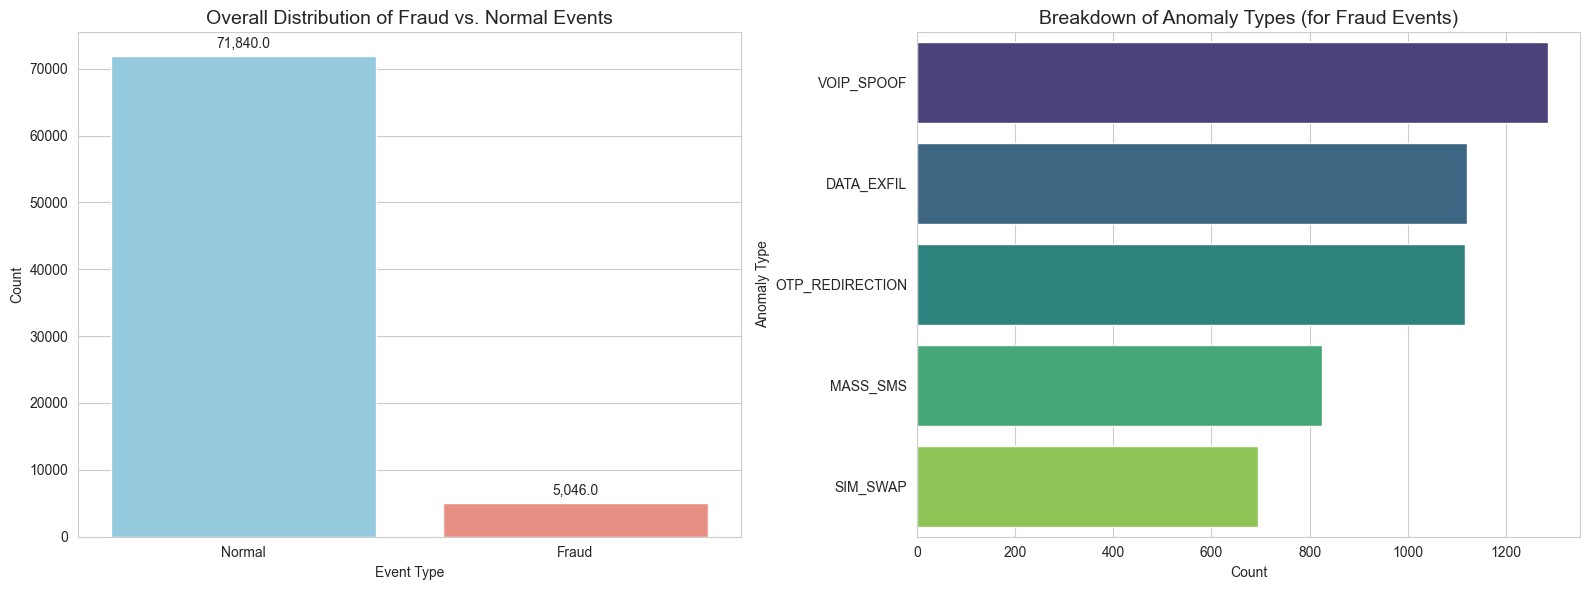

In [12]:
# --- 3. Target Variable Analysis ---

if df is not None:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot 1: Overall Fraud Distribution
    ax1 = sns.countplot(x='fraud_status', data=df, ax=axes[0], palette={'Normal':'skyblue', 'Fraud':'salmon'})
    ax1.set_title('Overall Distribution of Fraud vs. Normal Events', fontsize=14)
    ax1.set_xlabel('Event Type')
    ax1.set_ylabel('Count')
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    # Plot 2: Breakdown of Anomaly Types for Fraudulent Events
    fraud_df = df[df['is_fraud'] == 1]
    ax2 = sns.countplot(y='anomaly_type', data=fraud_df, order=fraud_df['anomaly_type'].value_counts().index, ax=axes[1], palette='viridis')
    ax2.set_title('Breakdown of Anomaly Types (for Fraud Events)', fontsize=14)
    ax2.set_xlabel('Count')
    ax2.set_ylabel('Anomaly Type')

    plt.tight_layout()
    plt.show()


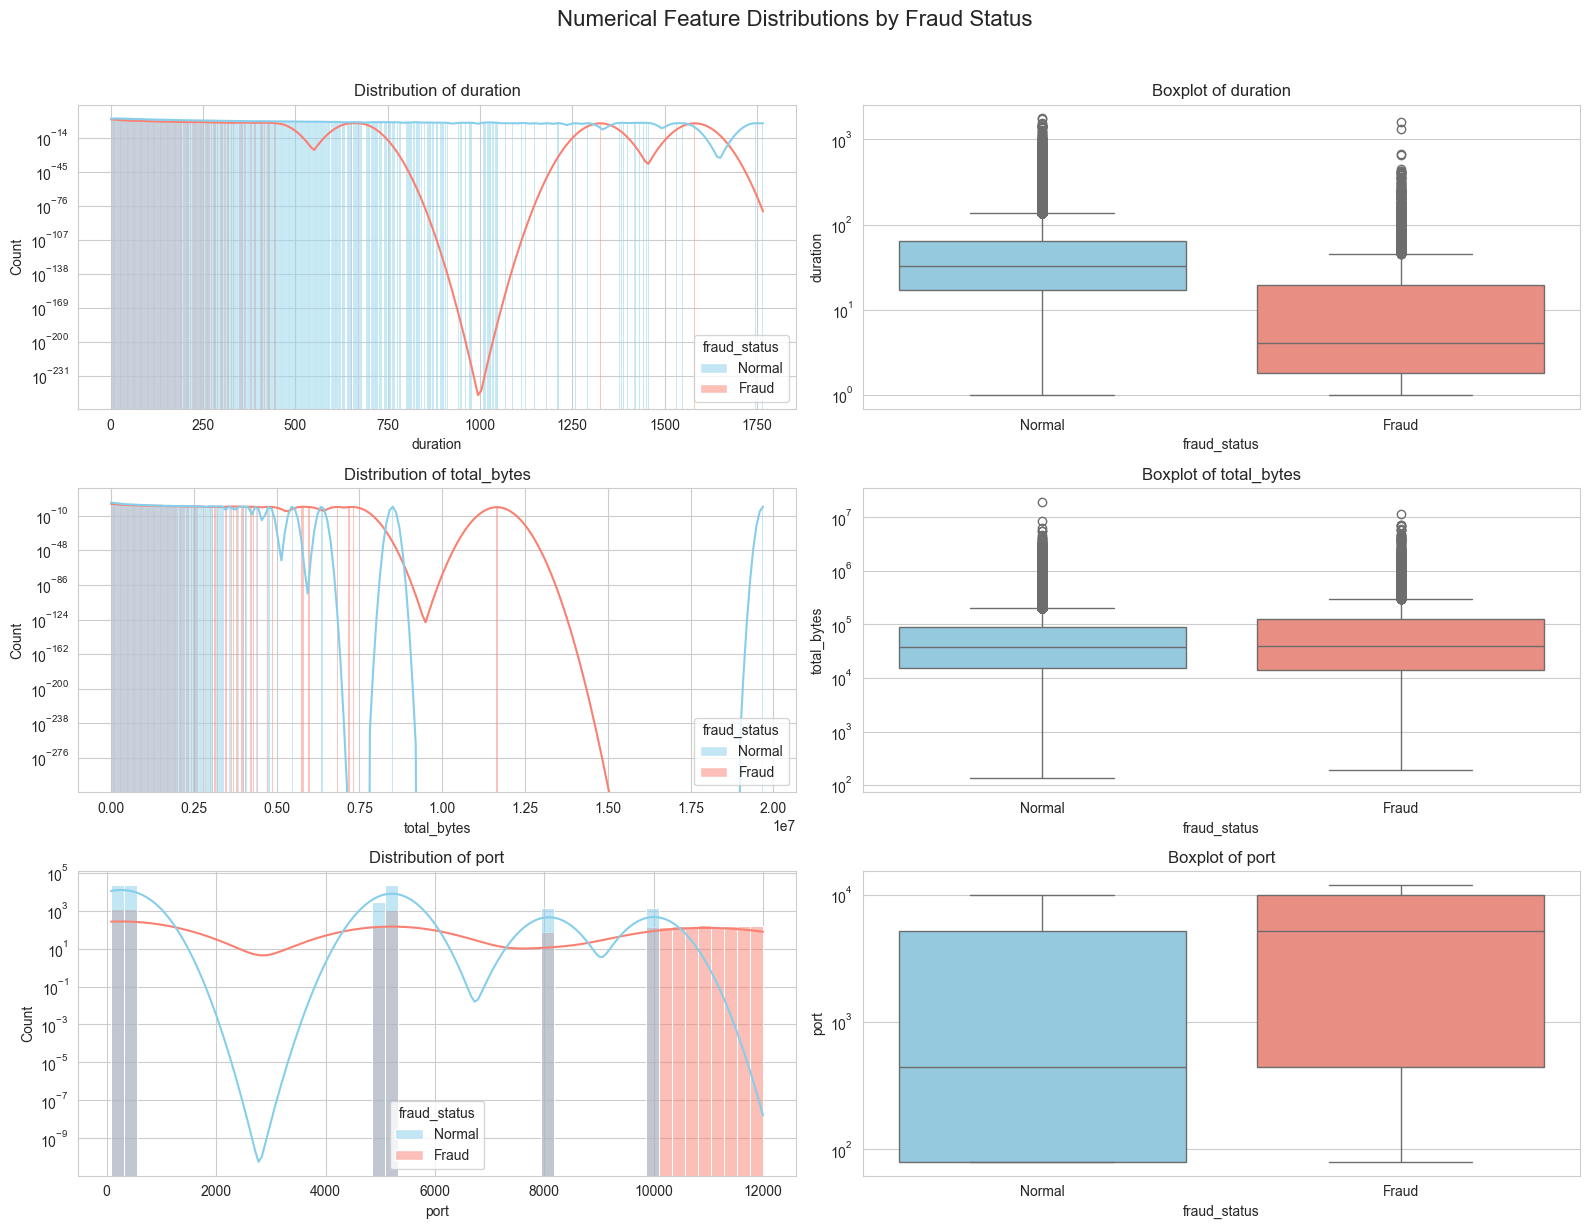

In [13]:
# --- 4.1. Numerical Feature Analysis ---

if df is not None:
    numerical_features = ['duration', 'total_bytes', 'port']
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(16, 12))
    fig.suptitle('Numerical Feature Distributions by Fraud Status', fontsize=16, y=1.02)

    for i, col in enumerate(numerical_features):
        sns.histplot(data=df, x=col, hue='fraud_status', kde=True, ax=axes[i, 0], palette={'Normal':'skyblue', 'Fraud':'salmon'})
        axes[i, 0].set_title(f'Distribution of {col}')
        axes[i, 0].set_yscale('log')

        sns.boxplot(data=df, x='fraud_status', y=col, ax=axes[i, 1], palette={'Normal':'skyblue', 'Fraud':'salmon'})
        axes[i, 1].set_title(f'Boxplot of {col}')
        axes[i, 1].set_yscale('log')

    plt.tight_layout()
    plt.show()


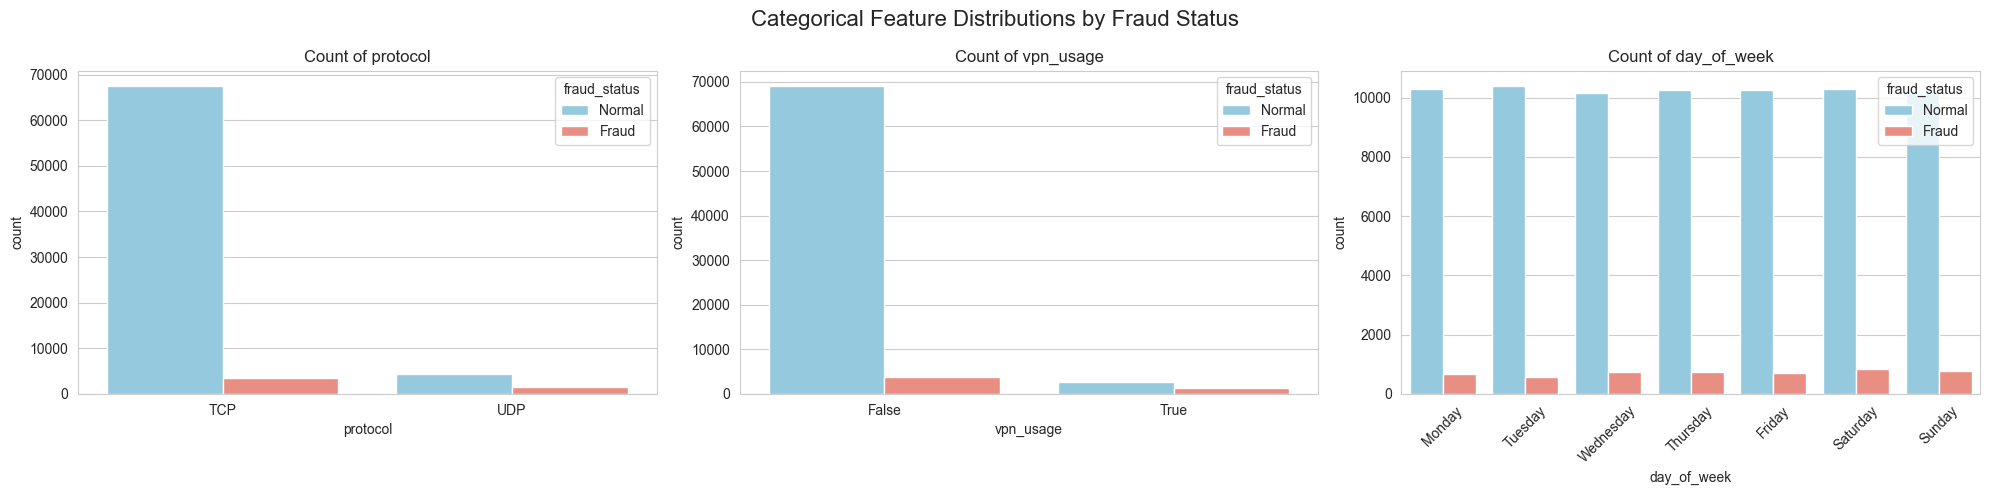

In [14]:
# --- 4.2. Categorical Feature Analysis ---

if df is not None:
    categorical_features = ['protocol', 'vpn_usage', 'day_of_week']
    fig, axes = plt.subplots(1, len(categorical_features), figsize=(20, 5))
    fig.suptitle('Categorical Feature Distributions by Fraud Status', fontsize=16)

    for i, col in enumerate(categorical_features):
        sns.countplot(data=df, x=col, hue='fraud_status', ax=axes[i], palette={'Normal':'skyblue', 'Fraud':'salmon'})
        axes[i].set_title(f'Count of {col}')
        if col == 'day_of_week':
            axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


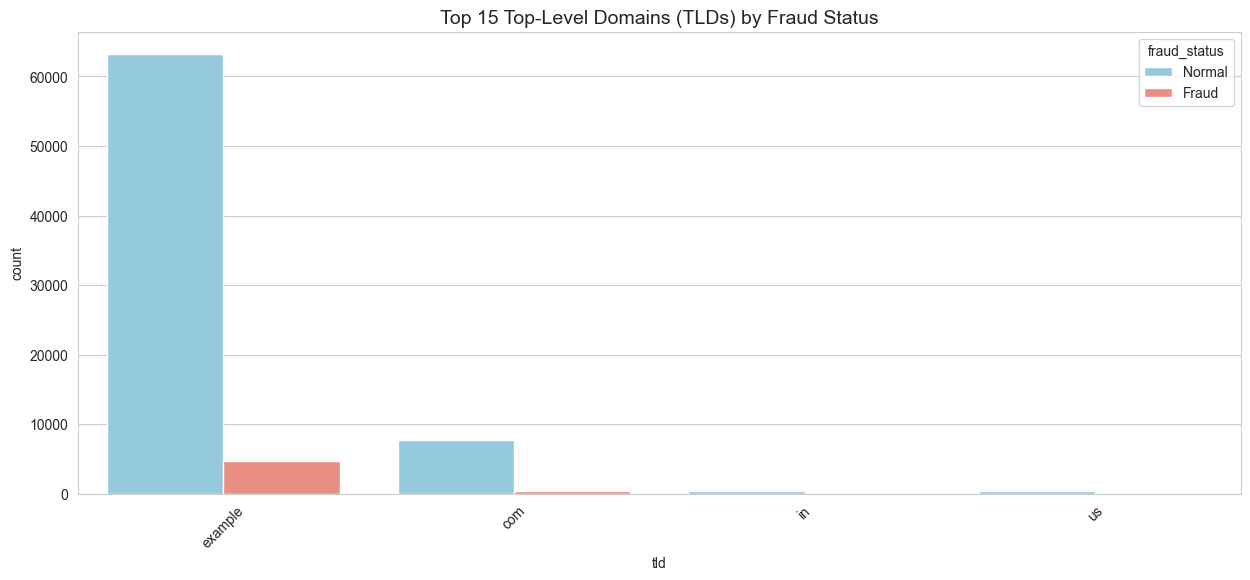

In [15]:
# --- 4.3. Analysis of Engineered TLD Feature ---

if df is not None:
    plt.figure(figsize=(15, 6))
    top_tlds = df['tld'].value_counts().nlargest(15).index
    sns.countplot(data=df[df['tld'].isin(top_tlds)], x='tld', hue='fraud_status', order=top_tlds, palette={'Normal':'skyblue', 'Fraud':'salmon'})
    plt.title('Top 15 Top-Level Domains (TLDs) by Fraud Status', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


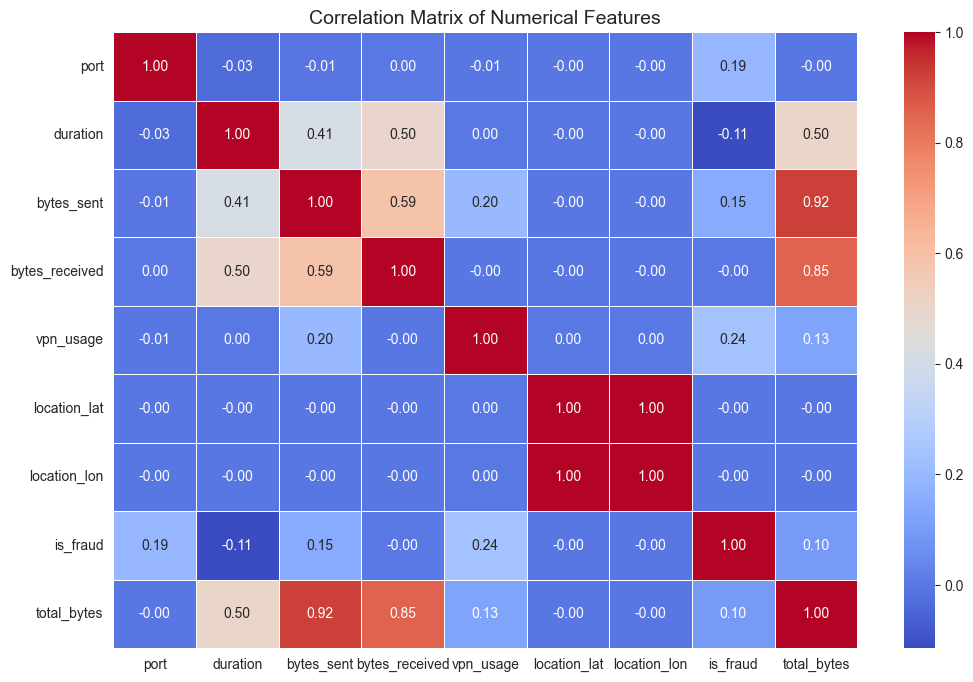

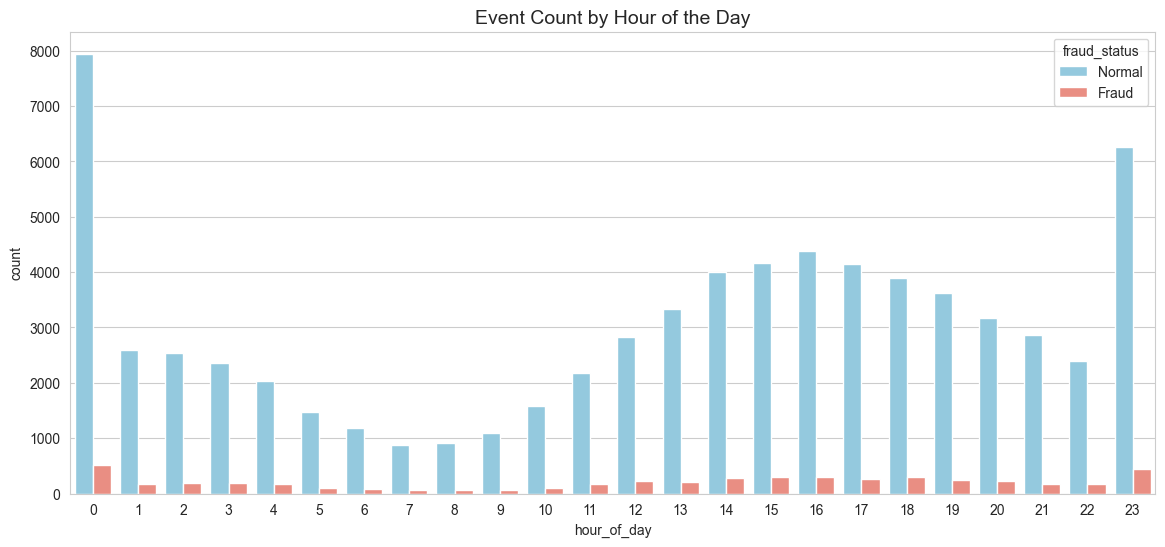

In [16]:
# --- 5.1. Correlation and Temporal Analysis ---

if df is not None:
    # --- Correlation Heatmap ---
    plt.figure(figsize=(12, 8))
    numeric_df = df.select_dtypes(include=['float64', 'int64', 'bool'])
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Matrix of Numerical Features', fontsize=14)
    plt.show()

    # --- Temporal Analysis: Fraud by Hour ---
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x='hour_of_day', hue='fraud_status', palette={'Normal':'skyblue', 'Fraud':'salmon'})
    plt.title('Event Count by Hour of the Day', fontsize=14)
    plt.show()


In [17]:
# --- 5.2. Geospatial Analysis (Interactive Map) ---

if df is not None:
    print("\nGenerating interactive map of event locations...")
    # To avoid plotting millions of points, we'll sample the normal events
    # and take all fraud events.
    fraud_locations = df[df['is_fraud'] == 1]
    normal_locations = df[df['is_fraud'] == 0].sample(n=min(5000, len(df[df['is_fraud']==0])), random_state=42)
    map_df = pd.concat([fraud_locations, normal_locations])

    fig = px.scatter_geo(map_df,
                         lat='location_lat',
                         lon='location_lon',
                         color='fraud_status',
                         color_discrete_map={'Normal': 'blue', 'Fraud': 'red'},
                         hover_name='user_id',
                         hover_data=['anomaly_type', 'domain', 'total_bytes'],
                         title='Geospatial Distribution of Normal vs. Fraudulent Events',
                         projection='natural earth')
    fig.show()



Generating interactive map of event locations...


In [18]:
# Assumes 'df' is your pre-loaded and prepared DataFrame from the EDA steps.

# Sort by user and time, which is crucial for time-based features
df = df.sort_values(by=['user_id', 'timestamp']).reset_index(drop=True)

print("DataFrame sorted by user_id and timestamp.")


DataFrame sorted by user_id and timestamp.


In [19]:
print("Creating user-level aggregate features...")

# Define aggregations to create a user profile
user_agg_features = df.groupby('user_id').agg(
    # Connection patterns
    total_connections=('event_id', 'count'),
    unique_dst_ips=('ip_dst', 'nunique'),
    unique_cell_ids=('cell_id', 'nunique'),
    
    # Data usage patterns
    avg_duration=('duration', 'mean'),
    std_duration=('duration', 'std'),
    total_data_usage=('total_bytes', 'sum'),
    avg_data_per_session=('total_bytes', 'mean'),
    
    # VPN usage
    vpn_sessions=('vpn_usage', 'sum'),
    
    # Location patterns
    lat_std=('location_lat', 'std'),
    lon_std=('location_lon', 'std')
)

# Add a feature for VPN usage percentage
user_agg_features['vpn_usage_ratio'] = user_agg_features['vpn_sessions'] / user_agg_features['total_connections']

# Clean up column names for merging
user_agg_features.columns = ['user_' + col for col in user_agg_features.columns]
user_agg_features.fillna(0, inplace=True) # Fill std=NaN for users with 1 connection

# Merge these new features back into the original dataframe
df = pd.merge(df, user_agg_features, on='user_id', how='left')

print("User-level features created and merged.")

# Display some of the new features
new_feature_cols = [col for col in df.columns if col.startswith('user_')]
display(df[['user_id', 'timestamp'] + new_feature_cols].head())


Creating user-level aggregate features...
User-level features created and merged.


,user_id,timestamp,user_id,user_total_connections,user_unique_dst_ips,user_unique_cell_ids,user_avg_duration,user_std_duration,user_total_data_usage,user_avg_data_per_session,user_vpn_sessions,user_lat_std,user_lon_std,user_vpn_usage_ratio
0,00161c58988e3bd9,2025-09-01 00:08:35.797038,00161c58988e3bd9,73,73,1,50.16,66.35,6952456,"95,239.12",3,0.00,0.00,0.04
1,00161c58988e3bd9,2025-09-01 00:34:21.301139,00161c58988e3bd9,73,73,1,50.16,66.35,6952456,"95,239.12",3,0.00,0.00,0.04
2,00161c58988e3bd9,2025-09-01 00:42:34.939184,00161c58988e3bd9,73,73,1,50.16,66.35,6952456,"95,239.12",3,0.00,0.00,0.04
3,00161c58988e3bd9,2025-09-01 00:50:04.177045,00161c58988e3bd9,73,73,1,50.16,66.35,6952456,"95,239.12",3,0.00,0.00,0.04
4,00161c58988e3bd9,2025-09-01 00:52:52.338983,00161c58988e3bd9,73,73,1,50.16,66.35,6952456,"95,239.12",3,0.00,0.00,0.04


In [20]:
print("Creating time-window features (this may take a minute)...")

# Set timestamp as index for rolling window operations
df_time_indexed = df.set_index('timestamp')

# Calculate rolling counts of events per user over different time windows
df['user_events_last_24h'] = df_time_indexed.groupby('user_id')['event_id'].rolling('24h').count().reset_index(0, drop=True)
df['user_events_last_1h'] = df_time_indexed.groupby('user_id')['event_id'].rolling('1h').count().reset_index(0, drop=True)

# Calculate rolling sum of data used by a user
df['user_bytes_last_24h'] = df_time_indexed.groupby('user_id')['total_bytes'].rolling('24h').sum().reset_index(0, drop=True)

df.fillna(0, inplace=True) # Fill NaNs created by rolling windows at the start

print("Time-window features created.")
display(df[['user_id', 'timestamp', 'user_events_last_1h', 'user_events_last_24h', 'user_bytes_last_24h']].tail())


Creating time-window features (this may take a minute)...
Time-window features created.


,user_id,timestamp,user_events_last_1h,user_events_last_24h,user_bytes_last_24h
76881,fff32e44e4d7cdbd,2025-09-06 03:10:33.912735,0.00,0.00,0.00
76882,fff32e44e4d7cdbd,2025-09-06 05:54:03.875522,0.00,0.00,0.00
76883,fff32e44e4d7cdbd,2025-09-06 05:55:09.959022,0.00,0.00,0.00
76884,fff32e44e4d7cdbd,2025-09-06 06:04:54.216290,0.00,0.00,0.00
76885,fff32e44e4d7cdbd,2025-09-07 08:45:24.795851,0.00,0.00,0.00


In [21]:
print("Encoding categorical features...")

# For binary categorical features, simple mapping is efficient
df['protocol_is_tcp'] = df['protocol'].apply(lambda x: 1 if x == 'TCP' else 0)

# Convert boolean 'vpn_usage' to integer (True=1, False=0)
# Note: This might have been done in the EDA, but re-running is safe.
df['vpn_usage'] = df['vpn_usage'].astype(int)

print("Binary features 'protocol' and 'vpn_usage' converted to integers.")
display(df[['protocol', 'protocol_is_tcp', 'vpn_usage']].head())


Encoding categorical features...
Binary features 'protocol' and 'vpn_usage' converted to integers.


,protocol,protocol_is_tcp,vpn_usage
0,TCP,1,0
1,TCP,1,0
2,UDP,0,0
3,UDP,0,0
4,TCP,1,0


In [22]:
print("Feature engineering complete. Reviewing final DataFrame.")

print("\nFinal DataFrame Info:")
df.info()

print("\nSample of the final DataFrame with all new features:")
display(df.head())


Feature engineering complete. Reviewing final DataFrame.

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76886 entries, 0 to 76885
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   event_id                   76886 non-null  object        
 1   user_id                    76886 non-null  object        
 2   imsi                       76886 non-null  object        
 3   imei                       76886 non-null  object        
 4   timestamp                  76886 non-null  datetime64[ns]
 5   domain                     76886 non-null  object        
 6   ip_src                     76886 non-null  object        
 7   ip_dst                     76886 non-null  object        
 8   port                       76886 non-null  int64         
 9   protocol                   76886 non-null  object        
 10  duration                   76886 non-null  float64

,event_id,user_id,imsi,imei,timestamp,domain,ip_src,ip_dst,port,protocol,...,user_total_data_usage,user_avg_data_per_session,user_vpn_sessions,user_lat_std,user_lon_std,user_vpn_usage_ratio,user_events_last_24h,user_events_last_1h,user_bytes_last_24h,protocol_is_tcp
0,5e6e486521976325,00161c58988e3bd9,dce2c22e82a34f2f,55f82b2ebacff0fc,2025-09-01 00:08:35.797038,site60.example,10.0.254.221,10.0.168.43,80,TCP,...,6952456,"95,239.12",3,0.00,0.00,0.04,0.00,0.00,0.00,1
1,05ee4944a48b5d48,00161c58988e3bd9,dce2c22e82a34f2f,55f82b2ebacff0fc,2025-09-01 00:34:21.301139,site71.example,10.0.254.70,10.0.125.134,80,TCP,...,6952456,"95,239.12",3,0.00,0.00,0.04,0.00,0.00,0.00,1
2,df9cc08c9c97f707,00161c58988e3bd9,dce2c22e82a34f2f,55f82b2ebacff0fc,2025-09-01 00:42:34.939184,whatsapp.com,10.0.254.116,10.0.44.241,443,UDP,...,6952456,"95,239.12",3,0.00,0.00,0.04,0.00,0.00,0.00,0
3,fcf41d8d6ae2c99c,00161c58988e3bd9,dce2c22e82a34f2f,55f82b2ebacff0fc,2025-09-01 00:50:04.177045,facebook.com,10.0.254.172,10.0.164.179,5060,UDP,...,6952456,"95,239.12",3,0.00,0.00,0.04,0.00,0.00,0.00,0
4,6500c0e290fc2bb6,00161c58988e3bd9,dce2c22e82a34f2f,55f82b2ebacff0fc,2025-09-01 00:52:52.338983,site1471.example,10.0.254.167,10.0.254.42,443,TCP,...,6952456,"95,239.12",3,0.00,0.00,0.04,0.00,0.00,0.00,1


In [ ]:
# # Convert the 'Timestamp' column from object to datetime
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# # Verify the change
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SrcIP       2000 non-null   object        
 1   DstIP       2000 non-null   object        
 2   SrcPort     2000 non-null   int64         
 3   DstPort     2000 non-null   int64         
 4   Timestamp   2000 non-null   datetime64[ns]
 5   Protocol    2000 non-null   object        
 6   DataVolume  2000 non-null   int64         
 7   FraudType   1304 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 125.1+ KB


In [ ]:
# df.head()


,SrcIP,DstIP,SrcPort,DstPort,Timestamp,Protocol,DataVolume,FraudType
0,192.168.63.192,10.0.201.1,5385,443,2023-11-12 08:18:22,UDP,8305754,DDoS
1,192.168.141.215,10.0.101.136,4365,53,2023-09-01 22:26:05,UDP,9987103,NaN
2,192.168.243.223,10.0.198.160,8851,443,2023-03-12 08:01:06,TCP,6062294,NaN
3,192.168.21.35,10.0.142.55,36969,22,2023-04-15 05:48:09,TCP,1608877,Espionage
4,192.168.216.104,10.0.20.30,1669,80,2023-05-12 02:42:53,UDP,4767985,DDoS


In [ ]:
# # Create the 'is_fraud' column. 1 if FraudType is not null, 0 if it is.
# df['is_fraud'] = df['FraudType'].notna().astype(int)

# # You can also keep the original labels by filling the nulls
# df['FraudType'] = df['FraudType'].fillna('Normal')

# # Verify the new columns and their distribution
# print("Fraud vs. Normal count:")
# print(df['is_fraud'].value_counts())

# print("\nFraud types breakdown:")
# print(df['FraudType'].value_counts())

Fraud vs. Normal count:
is_fraud
1    1304
0     696
Name: count, dtype: int64

Fraud types breakdown:
FraudType
Normal       696
DDoS         667
Espionage    637
Name: count, dtype: int64


In [ ]:
# # Extract the hour of the day from the Timestamp
# df['hour_of_day'] = df['Timestamp'].dt.hour

# # You could also extract the day of the week if you had a larger dataset
# # df['day_of_week'] = df['Timestamp'].dt.dayofweek

# print(df[['Timestamp', 'hour_of_day']].head())

            Timestamp  hour_of_day
0 2023-11-12 08:18:22            8
1 2023-09-01 22:26:05           22
2 2023-03-12 08:01:06            8
3 2023-04-15 05:48:09            5
4 2023-05-12 02:42:53            2


In [ ]:
# # Create aggregate features based on the source IP
# ip_features = df.groupby('SrcIP').agg(
#     connection_count=('DstIP', 'count'),          # How many connections from this IP?
#     avg_data_volume=('DataVolume', 'mean'),      # Average data sent by this IP
#     port_diversity=('DstPort', 'nunique')        # How many unique ports does this IP contact?
# ).reset_index()

# # Merge these new features back into the original dataframe
# df = pd.merge(df, ip_features, on='SrcIP', how='left')

# print(df[['SrcIP', 'connection_count', 'avg_data_volume', 'port_diversity']].head())

             SrcIP  connection_count  avg_data_volume  port_diversity
0   192.168.63.192                 1        8305754.0               1
1  192.168.141.215                 1        9987103.0               1
2  192.168.243.223                 1        6062294.0               1
3    192.168.21.35                 1        1608877.0               1
4  192.168.216.104                 1        4767985.0               1


In [ ]:
# # Convert 'Protocol' using one-hot encoding
# df = pd.get_dummies(df, columns=['Protocol'], prefix='proto')

# print(df.head())

             SrcIP         DstIP  SrcPort  DstPort           Timestamp  \
0   192.168.63.192    10.0.201.1     5385      443 2023-11-12 08:18:22   
1  192.168.141.215  10.0.101.136     4365       53 2023-09-01 22:26:05   
2  192.168.243.223  10.0.198.160     8851      443 2023-03-12 08:01:06   
3    192.168.21.35   10.0.142.55    36969       22 2023-04-15 05:48:09   
4  192.168.216.104    10.0.20.30     1669       80 2023-05-12 02:42:53   

   DataVolume  FraudType  is_fraud  hour_of_day  connection_count  \
0     8305754       DDoS         1            8                 1   
1     9987103     Normal         0           22                 1   
2     6062294     Normal         0            8                 1   
3     1608877  Espionage         1            5                 1   
4     4767985       DDoS         1            2                 1   

   avg_data_volume  port_diversity  proto_TCP  proto_UDP  
0        8305754.0               1      False       True  
1        9987103.0    

In [ ]:
# # #improve the model

# # # Sort the DataFrame by the Timestamp column
# # df.sort_values('Timestamp', inplace=True)

# # print("DataFrame sorted by time.")
# # print(df[['Timestamp']].head())
# # # Set the Timestamp column as the index of the DataFrame
# # df.set_index('Timestamp', inplace=True)

# # print("Timestamp is now the index.")

# # # Define the time window
# # time_window = '5T' # This means 5 minutes

# # print(f"Creating features for a {time_window} rolling window...")

# # # Create new features
# # # For each source IP, count how many connections it made in the last 5 minutes.
# # df['connections_last_5m'] = df.groupby('SrcIP')['SrcIP'].rolling(time_window).count().reset_index(level=0, drop=True)

# # # For each source IP, count how many unique destination ports it contacted in the last 5 minutes.
# # df['unique_ports_last_5m'] = df.groupby('SrcIP')['DstPort'].rolling(time_window).nunique().reset_index(level=0, drop=True)

# # # For each source IP, calculate the average data volume in the last 5 minutes.
# # df['avg_datavolume_last_5m'] = df.groupby('SrcIP')['DataVolume'].rolling(time_window).mean().reset_index(level=0, drop=True)

# # print("New time-window features created.")

# # # Fill any resulting NaN values with 0
# # df.fillna(0, inplace=True)

# # # Reset the index to bring 'Timestamp' back as a column
# # df.reset_index(inplace=True)

# # print("\nNaNs filled and index reset. Here's a look at the new features:")
# # print(df[['SrcIP', 'Timestamp', 'connections_last_5m', 'unique_ports_last_5m', 'avg_datavolume_last_5m']].head())


# import pandas as pd
# import numpy as np

# # --- 1. Data Loading and Preparation (Assuming this part is correct) ---
# data = {
#     'Timestamp': pd.to_datetime(['2023-10-26 12:00:00', '2023-10-26 12:01:00', '2023-10-26 12:02:00', '2023-10-26 12:03:00', '2023-10-26 12:05:00', '2023-10-26 12:06:00']),
#     'SrcIP': ['192.168.1.1', '192.168.1.2', '192.168.1.1', '192.168.1.3', '192.168.1.1', '192.168.1.2'],
#     'DstPort': [80, 443, 443, 80, 53, 8080],
#     'DataVolume': [1500, 2500, 500, 1200, 300, 4500]
# }
# df = pd.DataFrame(data)

# # --- 2. Pre-computation and Indexing ---
# df = df.sort_values('Timestamp').set_index('Timestamp')

# # --- 3. Feature Engineering ---

# # FIX 1: Use 'min' instead of the deprecated 'T' for minutes.
# time_window = '5min'

# # FIX 2: Define aggregations for the fast, optimized functions first.
# optimized_aggregations = {
#     'DstPort': 'count',
#     'DataVolume': 'mean'
# }

# print(f"Creating features for a {time_window} rolling window...")

# # Step 1: Perform the fast, optimized aggregations.
# rolling_features = df.groupby('SrcIP').rolling(time_window).agg(optimized_aggregations)

# # Step 2: Calculate the non-optimized 'nunique' separately using .apply().
# # We apply a lambda function that computes the number of unique items for each window.
# unique_ports = df.groupby('SrcIP')['DstPort'].rolling(time_window).apply(lambda x: x.nunique())
# # Rename the resulting Series for clarity before joining.
# unique_ports.name = 'unique_ports_last_5m'

# # Step 3: Join the 'nunique' results back to the main feature set.
# rolling_features = rolling_features.join(unique_ports)

# # --- 4. Final DataFrame Cleanup ---

# # Clean up the index and rename columns
# rolling_features = rolling_features.reset_index(level=0, drop=True)
# rolling_features = rolling_features.rename(columns={
#     'DstPort': 'connections_last_5m',
#     'DataVolume': 'avg_datavolume_last_5m'
# })

# # Join the new features back to the original DataFrame
# df = df.join(rolling_features)

# # Fill any resulting NaN values with 0
# df.fillna(0, inplace=True)

# # Reset the index to bring 'Timestamp' back as a column
# df = df.reset_index()

# print("\n--- Final DataFrame with All Features ---")
# print(df[['SrcIP', 'Timestamp', 'connections_last_5m', 'unique_ports_last_5m', 'avg_datavolume_last_5m']])


Creating features for a 5min rolling window...

--- Final DataFrame with All Features ---
         SrcIP           Timestamp  connections_last_5m  unique_ports_last_5m  \
0  192.168.1.1 2023-10-26 12:00:00                  1.0                   1.0   
1  192.168.1.2 2023-10-26 12:01:00                  1.0                   1.0   
2  192.168.1.1 2023-10-26 12:02:00                  2.0                   2.0   
3  192.168.1.3 2023-10-26 12:03:00                  1.0                   1.0   
4  192.168.1.1 2023-10-26 12:05:00                  2.0                   2.0   
5  192.168.1.2 2023-10-26 12:06:00                  1.0                   1.0   

   avg_datavolume_last_5m  
0                  1500.0  
1                  2500.0  
2                  1000.0  
3                  1200.0  
4                   400.0  
5                  4500.0  


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier

# --- New imports for this workflow ---
from imblearn.pipeline import Pipeline as ImbPipeline # Renamed to avoid confusion
from imblearn.over_sampling import SMOTE

# Assumes 'df' is your final feature-engineered DataFrame.

# 1. Define the Target Variable
y = df['is_fraud']

# 2. Define the Features (X)
features_to_drop = [
    'event_id', 'user_id', 'imsi', 'imei', 'timestamp', 'protocol',
    'is_fraud', 'anomaly_type', 'runbook_id', 'fraud_status'
]
X = df.drop(columns=features_to_drop)

# 3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Data successfully split into training and testing sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Data successfully split into training and testing sets.
Training set shape: (57664, 30)
Testing set shape: (19222, 30)


In [24]:
# 1. Identify Numerical and Categorical Feature Names
numerical_features = X.select_dtypes(include=['int64', 'float64', 'int32']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 2. Create the Preprocessing Step (same as before)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# 3. Dynamically and Safely Configure SMOTE
print("--- Configuring SMOTE ---")
print("Class distribution before SMOTE:", y_train.value_counts().to_dict())

# Determine the number of samples in the minority class
minority_class_count = y_train.value_counts().min()

# Set k_neighbors to be one less than the number of minority samples, if it's too small.
k_neighbors_value = max(1, minority_class_count - 1)
print(f"Adjusting SMOTE k_neighbors to: {k_neighbors_value}")

# 4. Create the Full imblearn Pipeline
# This pipeline correctly applies SMOTE only during the fitting process.
model_pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, k_neighbors=k_neighbors_value)),
    ('classifier', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42
        # We no longer need scale_pos_weight because SMOTE is balancing the data
    ))
])

print("\nAdvanced imblearn model pipeline created successfully:")
display(model_pipeline_smote)


--- Configuring SMOTE ---
Class distribution before SMOTE: {0: 53880, 1: 3784}
Adjusting SMOTE k_neighbors to: 3783

Advanced imblearn model pipeline created successfully:


,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [25]:
print("Training the XGBoost model pipeline with SMOTE...")

# The pipeline automatically handles preprocessing and resampling of the training data
model_pipeline_smote.fit(X_train, y_train)

print("Model training complete.")


Training the XGBoost model pipeline with SMOTE...
Model training complete.


Evaluating model performance on the original test set...

--- Classification Report (with SMOTE) ---
              precision    recall  f1-score   support

  Normal (0)       0.99      1.00      1.00     17960
   Fraud (1)       0.98      0.87      0.93      1262

    accuracy                           0.99     19222
   macro avg       0.99      0.94      0.96     19222
weighted avg       0.99      0.99      0.99     19222


--- Confusion Matrix (with SMOTE) ---


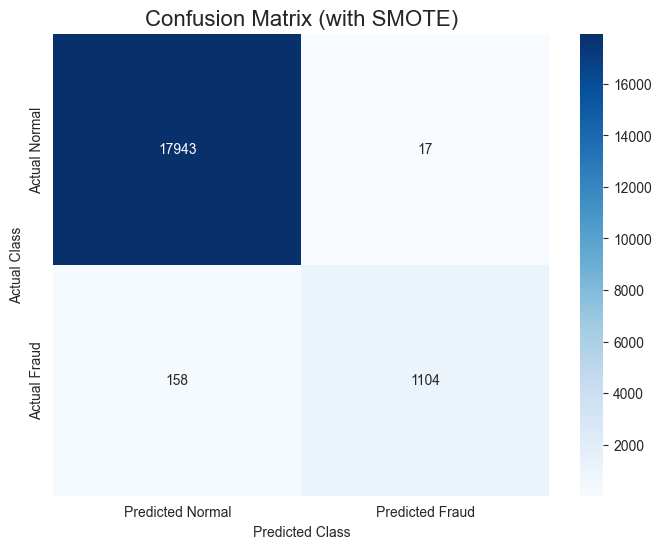

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Evaluating model performance on the original test set...")

# Make predictions on the test data
y_pred_smote = model_pipeline_smote.predict(X_test)

# --- Classification Report ---
print("\n--- Classification Report (with SMOTE) ---")
print(classification_report(y_test, y_pred_smote, target_names=['Normal (0)', 'Fraud (1)']))

# --- Confusion Matrix ---
print("\n--- Confusion Matrix (with SMOTE) ---")
cm = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix (with SMOTE)', fontsize=16)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import SMOTE

# # --- 1. Data Preparation (Assuming 'df' is your prepared DataFrame) ---
# # For this example, we'll recreate a similar DataFrame to ensure it's runnable.
# data = {
#     'DstPort': np.random.randint(1, 65535, 100),
#     'DataVolume': np.random.randint(100, 5000, 100),
#     'connections_last_5m': np.random.randint(1, 50, 100),
#     'unique_ports_last_5m': np.random.randint(1, 10, 100),
#     'avg_datavolume_last_5m': np.random.uniform(500, 2000, 100),
#     'is_fraud': [0] * 95 + [1] * 5
# }
# df = pd.DataFrame(data)

# feature_columns = [
#     'DstPort', 'DataVolume', 'connections_last_5m',
#     'unique_ports_last_5m', 'avg_datavolume_last_5m'
# ]
# X = df[feature_columns]
# y = df['is_fraud']

# # --- 2. Split Data into Training and Testing Sets ---
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42, stratify=y
# )

# # --- 3. Apply SMOTE with Robust `k_neighbors` ---
# print("Class distribution before SMOTE:", y_train.value_counts().to_dict())

# # --- FIX IS HERE ---
# # Determine the number of samples in the minority class
# minority_class_count = y_train.value_counts().min()

# # Set k_neighbors to be one less than the number of minority samples, if it's too small.
# # The default k_neighbors is 5. We only adjust if we have fewer than 6 samples.
# if minority_class_count < 6:
#     k_neighbors_value = minority_class_count - 1
# else:
#     k_neighbors_value = 5

# print(f"Adjusting SMOTE k_neighbors to: {k_neighbors_value}")

# # Ensure k_neighbors is at least 1, as SMOTE requires it.
# if k_neighbors_value > 0:
#     smote = SMOTE(random_state=42, k_neighbors=k_neighbors_value)
#     X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#     print("Class distribution after SMOTE:", y_train_resampled.value_counts().to_dict())
# else:
#     # If there's only 1 sample, SMOTE can't run. We'll just use the original data.
#     print("Cannot apply SMOTE, minority class has only 1 sample. Using original training data.")
#     X_train_resampled, y_train_resampled = X_train, y_train

# print("\n")

# # --- 4. Scale Numerical Features ---
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_resampled)
# X_test_scaled = scaler.transform(X_test)

# print("--- Data successfully split, resampled, and scaled. Ready for modeling. ---")
# print(f"Shape of scaled training data: {X_train_scaled.shape}")
# print(f"Shape of scaled test data: {X_test_scaled.shape}")


Class distribution before SMOTE: {0: 66, 1: 4}
Adjusting SMOTE k_neighbors to: 3
Class distribution after SMOTE: {0: 66, 1: 66}


--- Data successfully split, resampled, and scaled. Ready for modeling. ---
Shape of scaled training data: (132, 5)
Shape of scaled test data: (30, 5)


In [ ]:
# print("Training features shape:", X_train_scaled.shape)
# print("Testing features shape:", X_test_scaled.shape)

Training features shape: (132, 5)
Testing features shape: (30, 5)


In [27]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Extract the trained classifier and preprocessor from the pipeline
xgb_classifier = model_pipeline_smote.named_steps['classifier']
preprocessor = model_pipeline_smote.named_steps['preprocessor']

# 2. Get the feature names from the preprocessor
# This is a bit complex because the preprocessor creates new columns (e.g., from one-hot encoding)
# We need to get the names in the correct order.
numeric_features = model_pipeline_smote.named_steps['preprocessor'].transformers_[0][2]
categorical_features_raw = model_pipeline_smote.named_steps['preprocessor'].transformers_[1][2]
ohe_categories = model_pipeline_smote.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].categories_

# Create the list of one-hot encoded feature names
ohe_feature_names = []
for i, col in enumerate(categorical_features_raw):
    for cat in ohe_categories[i]:
        ohe_feature_names.append(f"{col}_{cat}")

# Combine all feature names in the correct order
all_feature_names = list(numeric_features) + ohe_feature_names

# 3. Create a DataFrame of feature importances
importances = xgb_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 4. Plot the top 20 most important features
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Most Important Features', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 10 features as a table
print("\nTop 10 Most Important Features:")
display(feature_importance_df.head(10))


AttributeError: 'OneHotEncoder' object has no attribute 'named_steps'

Evaluating model performance on the original, untouched test set...

Model ROC AUC Score: 0.9434

--- Classification Report (with SMOTE) ---
              precision    recall  f1-score   support

  Normal (0)       0.99      1.00      1.00     17960
   Fraud (1)       0.98      0.87      0.93      1262

    accuracy                           0.99     19222
   macro avg       0.99      0.94      0.96     19222
weighted avg       0.99      0.99      0.99     19222


--- Confusion Matrix (with SMOTE) ---


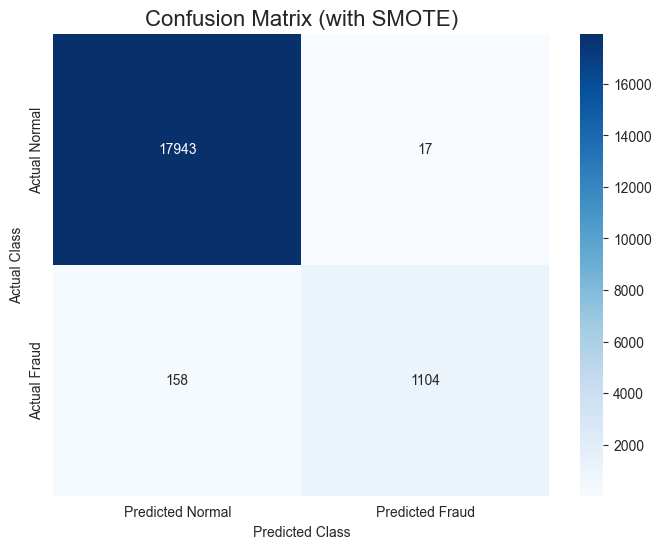

In [28]:
# import xgboost as xgb
# from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# # 1. Initialize the XGBoost Classifier
# # We use 'use_label_encoder=False' and 'eval_metric' to avoid deprecation warnings.
# xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# # 2. Train the model on your resampled and scaled training data
# print("Training the XGBoost model...")
# xgb_classifier.fit(X_train_scaled, y_train_resampled)
# print("Model training complete.")

# # 3. Make predictions on the scaled test data
# y_pred = xgb_classifier.predict(X_test_scaled)
# y_pred_proba = xgb_classifier.predict_proba(X_test_scaled)[:, 1] # Probabilities for AUC

# # 4. Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# auc = roc_auc_score(y_test, y_pred_proba)
# report = classification_report(y_test, y_pred, target_names=['Normal (0)', 'Fraud (1)'])

# print(f"\nModel Accuracy: {accuracy:.4f}")
# print(f"Model AUC Score: {auc:.4f}")
# print("\nClassification Report:")
# print(report)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Evaluating model performance on the original, untouched test set...")

# 1. Make predictions on the test data using the trained pipeline
# The pipeline handles all preprocessing of the test data automatically.
y_pred = model_pipeline_smote.predict(X_test)
y_pred_proba = model_pipeline_smote.predict_proba(X_test)[:, 1] # Probabilities for the 'Fraud' class

# 2. Calculate Evaluation Metrics
# ROC AUC Score: Measures the model's ability to distinguish between classes. A score of 1.0 is perfect.
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nModel ROC AUC Score: {auc_score:.4f}")

# 3. Generate and Print the Classification Report
# This gives precision, recall, and f1-score for each class.
print("\n--- Classification Report (with SMOTE) ---")
print(classification_report(y_test, y_pred, target_names=['Normal (0)', 'Fraud (1)']))

# 4. Generate and Display the Confusion Matrix
# This visualizes the true positives, false positives, true negatives, and false negatives.
print("\n--- Confusion Matrix (with SMOTE) ---")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix (with SMOTE)', fontsize=16)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


In [ ]:
# import xgboost as xgb
# from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# # --- 1. Calculate scale_pos_weight for Imbalance Handling ---
# # This is the most critical step for imbalanced classification with XGBoost.
# # It tells the model how much more to weight the minority class (fraud).
# # We calculate it from the ORIGINAL training set (before any resampling).
# neg_count = y_train.value_counts()[0]
# pos_count = y_train.value_counts()[1]
# scale_pos_weight_value = neg_count / pos_count

# print(f"Negative class count (Normal): {neg_count}")
# print(f"Positive class count (Fraud): {pos_count}")
# print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}\n")


# # --- 2. Initialize the XGBoost Classifier with the New Parameter ---
# # We pass scale_pos_weight to the classifier.
# # Note: When using scale_pos_weight, it's often best to train on the original,
# # imbalanced data, not the SMOTE-resampled data.
# xgb_classifier = xgb.XGBClassifier(
#     use_label_encoder=False,
#     eval_metric='logloss',
#     scale_pos_weight=scale_pos_weight_value, # Here is the key improvement!
#     random_state=42
# )


# # --- 3. Train the Model on the Original (but Scaled) Training Data ---
# # We use X_train_scaled_original, which is the original X_train, just scaled.
# # This avoids the complexities and potential noise introduced by SMOTE.
# scaler = StandardScaler()
# X_train_scaled_original = scaler.fit_transform(X_train) # Fit on original train data
# X_test_scaled = scaler.transform(X_test) # Transform test data with the same scaler

# print("Training the improved XGBoost model...")
# # Fit on the original (imbalanced) data, letting scale_pos_weight do the work.
# xgb_classifier.fit(X_train_scaled_original, y_train)
# print("Model training complete.")


# # --- 4. Evaluate the Improved Model's Performance ---
# y_pred = xgb_classifier.predict(X_test_scaled)
# y_pred_proba = xgb_classifier.predict_proba(X_test_scaled)[:, 1]

# accuracy = accuracy_score(y_test, y_pred)
# auc = roc_auc_score(y_test, y_pred_proba)
# report = classification_report(y_test, y_pred, target_names=['Normal (0)', 'Fraud (1)'])

# print(f"\nImproved Model Accuracy: {accuracy:.4f}")
# print(f"Improved Model AUC Score: {auc:.4f}")
# print("\nImproved Classification Report:")
# print(report)


Negative class count (Normal): 66
Positive class count (Fraud): 4
Calculated scale_pos_weight: 16.50

Training the improved XGBoost model...
Model training complete.

Improved Model Accuracy: 0.8667
Improved Model AUC Score: 0.7586

Improved Classification Report:
              precision    recall  f1-score   support

  Normal (0)       0.96      0.90      0.93        29
   Fraud (1)       0.00      0.00      0.00         1

    accuracy                           0.87        30
   macro avg       0.48      0.45      0.46        30
weighted avg       0.93      0.87      0.90        30



C:\Users\bansa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [20:06:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [29]:
from sklearn.model_selection import train_test_split

# Assumes 'df' is your final feature-engineered DataFrame.

# 1. Define the Target Variable
y = df['is_fraud']

# 2. Define the Features (X)
features_to_drop = [
    'event_id', 'user_id', 'imsi', 'imei', 'timestamp', 'protocol',
    'is_fraud', 'anomaly_type', 'runbook_id', 'fraud_status'
]
X = df.drop(columns=features_to_drop)

# 3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Data successfully split into training and testing sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Data successfully split into training and testing sets.
Training set shape: (57664, 30)
Testing set shape: (19222, 30)


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier

# 1. Identify Numerical and Categorical Feature Names
numerical_features = X.select_dtypes(include=['int64', 'float64', 'int32']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 2. Create the Preprocessing Step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# 3. Calculate scale_pos_weight for Imbalance Handling
# This is the key step from your previous code.
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count

print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}\n")

# 4. Create the Full Pipeline with scale_pos_weight
# This pipeline is simpler as it doesn't need the imblearn library.
model_pipeline_weighted = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=scale_pos_weight_value, # The key parameter
        random_state=42
    ))
])

print("Model pipeline with 'scale_pos_weight' created successfully:")
display(model_pipeline_weighted)


Calculated scale_pos_weight: 14.24

Model pipeline with 'scale_pos_weight' created successfully:


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [31]:
print("Training the XGBoost model with 'scale_pos_weight'...")

# The pipeline automatically handles preprocessing of the training data
model_pipeline_weighted.fit(X_train, y_train)

print("Model training complete.")


Training the XGBoost model with 'scale_pos_weight'...
Model training complete.


Evaluating model performance on the original test set...

Model ROC AUC Score (Weighted): 0.9475

--- Classification Report (Weighted) ---
              precision    recall  f1-score   support

  Normal (0)       0.99      1.00      0.99     17960
   Fraud (1)       0.94      0.89      0.91      1262

    accuracy                           0.99     19222
   macro avg       0.97      0.94      0.95     19222
weighted avg       0.99      0.99      0.99     19222


--- Confusion Matrix (Weighted) ---


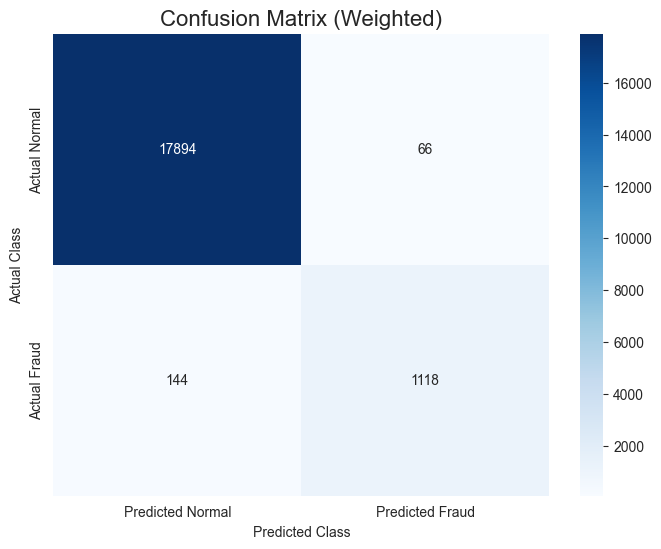

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

print("Evaluating model performance on the original test set...")

# Make predictions using the trained pipeline
y_pred_weighted = model_pipeline_weighted.predict(X_test)
y_pred_proba_weighted = model_pipeline_weighted.predict_proba(X_test)[:, 1]

# --- ROC AUC Score ---
auc_score = roc_auc_score(y_test, y_pred_proba_weighted)
print(f"\nModel ROC AUC Score (Weighted): {auc_score:.4f}")

# --- Classification Report ---
print("\n--- Classification Report (Weighted) ---")
print(classification_report(y_test, y_pred_weighted, target_names=['Normal (0)', 'Fraud (1)']))

# --- Confusion Matrix ---
print("\n--- Confusion Matrix (Weighted) ---")
cm = confusion_matrix(y_test, y_pred_weighted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix (Weighted)', fontsize=16)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


In [33]:
import shap
shap.initjs()

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assumes 'df' is your final feature-engineered DataFrame.

# 1. Define the Target Variable
y = df['is_fraud']

# 2. Define the Features (X)
# --- FIX IS HERE ---
# Add raw high-cardinality object columns to the drop list
features_to_drop = [
    'event_id', 'user_id', 'imsi', 'imei', 'timestamp', 'protocol',
    'is_fraud', 'anomaly_type', 'runbook_id', 'fraud_status',
    'domain', 'ip_src', 'ip_dst', 'cell_id' # These are the new additions
]
X = df.drop(columns=features_to_drop)

# 3. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Data successfully split into training and testing sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Verify that X_train no longer contains object columns that are not handled
print("\nRemaining object columns in X_train after dropping:")
print(X_train.select_dtypes(include=['object']).columns)


Data successfully split into training and testing sets.
Training set shape: (57664, 26)
Testing set shape: (19222, 26)

Remaining object columns in X_train after dropping:
Index(['day_of_week', 'tld'], dtype='object')


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier

# 1. Identify Numerical and Categorical Feature Names
# These will now correctly reflect the columns remaining in X_train
numerical_features = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns
low_cardinality_categorical_features = X_train.select_dtypes(include=['object']).columns # Should now only be 'day_of_week', 'tld'

print(f"Selected {len(numerical_features)} numerical features.")
print(f"Selected {len(low_cardinality_categorical_features)} low-cardinality categorical features for encoding.")

# 2. Create the Preprocessing Step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), low_cardinality_categorical_features)
    ],
    remainder='passthrough' # This should now pass through nothing, or only numerical columns
)

# 3. Calculate scale_pos_weight (no changes here)
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count
print(f"\nCalculated scale_pos_weight: {scale_pos_weight_value:.2f}\n")

# 4. Re-create the Full Pipeline
model_pipeline_weighted = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=scale_pos_weight_value,
        random_state=42
    ))
])

print("Model pipeline with selective encoding created successfully.")
display(model_pipeline_weighted)


Selected 24 numerical features.
Selected 2 low-cardinality categorical features for encoding.

Calculated scale_pos_weight: 14.24

Model pipeline with selective encoding created successfully.


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [41]:
print("Training the corrected XGBoost model pipeline...")

# Fit the newly defined pipeline
model_pipeline_weighted.fit(X_train, y_train)

# You'll also need to get new predictions for the SHAP analysis
y_pred_weighted = model_pipeline_weighted.predict(X_test)

print("Model training complete.")


Training the corrected XGBoost model pipeline...
Model training complete.


Calculating SHAP values... (this may take a moment)
SHAP values calculated successfully.

--- Global Feature Importance (SHAP Summary Plot) ---


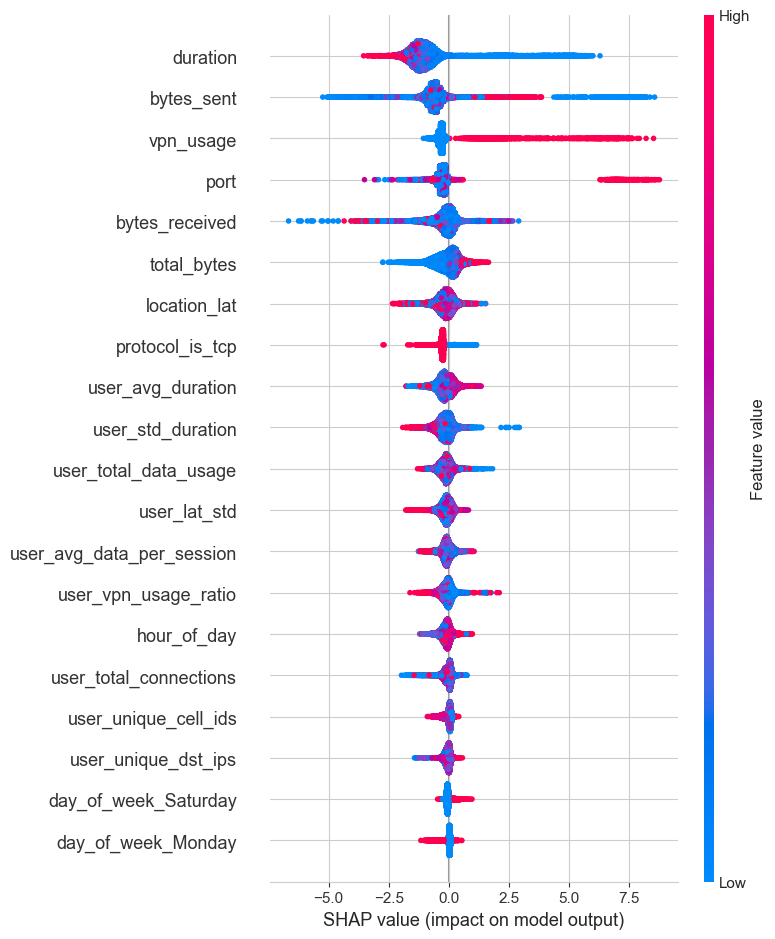


--- Explanation for a Single Correctly Identified Fraud Case ---
Explaining prediction for original index: 72420


In [43]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# This cell assumes your pipeline has been trained and you have X_test, y_test, etc.

# Initialize JavaScript for interactive SHAP plots in your notebook
shap.initjs()

# --- 1. Extract Components from the Trained Pipeline ---
classifier = model_pipeline_weighted.named_steps['classifier']
preprocessor = model_pipeline_weighted.named_steps['preprocessor']

# --- 2. Prepare Data for the Explainer ---
X_test_transformed = preprocessor.transform(X_test)

# --- 3. Reconstruct the Final Feature Names ---
numerical_features = preprocessor.transformers_[0][2]
low_cardinality_categorical_features = preprocessor.transformers_[1][2]
onehot_encoder = preprocessor.named_transformers_['cat']
ohe_categories = onehot_encoder.categories_
ohe_feature_names = []
for i, col in enumerate(low_cardinality_categorical_features):
    for cat in ohe_categories[i]:
        ohe_feature_names.append(f"{col}_{cat}")
final_feature_names = list(numerical_features) + ohe_feature_names

# --- 4. Create a DataFrame for SHAP ---
if hasattr(X_test_transformed, "toarray"):
    X_test_transformed_dense = X_test_transformed.toarray()
else:
    X_test_transformed_dense = X_test_transformed
X_test_transformed_df = pd.DataFrame(X_test_transformed_dense, columns=final_feature_names)

# --- 5. Calculate and Plot SHAP Values ---
print("Calculating SHAP values... (this may take a moment)")
explainer = shap.TreeExplainer(classifier)
shap_values = explainer(X_test_transformed_df)
print("SHAP values calculated successfully.")

# --- Global Importance Plot ---
print("\n--- Global Feature Importance (SHAP Summary Plot) ---")
shap.summary_plot(shap_values, X_test_transformed_df, plot_type="dot")

# --- Local Explanation Plot ---
print("\n--- Explanation for a Single Correctly Identified Fraud Case ---")
correct_fraud_indices = y_test[(y_test == 1) & (y_pred_weighted == 1)].index
if len(correct_fraud_indices) > 0:
    target_index = correct_fraud_indices[0]
    target_loc = X_test.index.get_loc(target_index)
    print(f"Explaining prediction for original index: {target_index}")

    # --- FIX IS HERE ---
    # We must use the transformed data (X_test_transformed_df) for the feature values
    # to ensure its dimensions match the dimensions of the shap_values.
    display(shap.force_plot(
        explainer.expected_value,
        shap_values.values[target_loc, :],
        X_test_transformed_df.iloc[target_loc, :] # Use the transformed data here
    ))
else:
    print("No correctly identified fraud cases found in the test set to explain.")



In [ ]:
# # import shap

# # # 1. Create a SHAP explainer object
# # explainer = shap.Explainer(xgb_classifier)

# # # 2. Calculate SHAP values for your test set
# # # This can take a moment as it calculates the contribution of each feature to each prediction
# # shap_values = explainer(X_test_scaled)

# # # Create a DataFrame for the test set with proper feature names for plotting
# # # X_test is the unscaled version of the test data
# # X_test_df = pd.DataFrame(X_test, columns=X.columns)

# # # --- Visualize the Explanations ---

# # # 3. Global Feature Importance (Summary Plot)
# # # Shows which features have the biggest impact on predictions across the entire dataset.
# # print("\n--- Global Feature Importance ---")
# # shap.summary_plot(shap_values, X_test_df, plot_type="bar", show=False)
# # plt.title("Overall Feature Importance (SHAP)")
# # plt.show()


# # # 4. Local Explanation for a single prediction (Force Plot)
# # # Let's explain the first fraudulent prediction in our test set.
# # print("\n--- Explanation for a Single Fraudulent Prediction ---")

# # # Find the index of the first true fraud case in the test set
# # fraud_index = y_test[y_test == 1].index[0]
# # # Find its position in the X_test array
# # fraud_loc = X_test.index.get_loc(fraud_index)

# # shap.initjs() # Initialize JavaScript for plotting in notebooks
# # display(shap.force_plot(explainer.expected_value, shap_values.values[fraud_loc,:], X_test_df.iloc[fraud_loc,:]))
# import shap
# import pandas as pd
# import matplotlib.pyplot as plt

# # Initialize JavaScript for SHAP plots in your notebook
# shap.initjs()

# # 1. Extract the trained classifier and the fitted preprocessor
# classifier = model_pipeline_weighted.named_steps['classifier']
# preprocessor = model_pipeline_weighted.named_steps['preprocessor']

# # 2. Transform the test data using the pipeline's preprocessor
# X_test_transformed = preprocessor.transform(X_test)

# # 3. Get the final feature names after preprocessing (CORRECTED LOGIC)
# numeric_features = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns
# categorical_features_raw = X_train.select_dtypes(include=['object']).columns

# # --- FIX IS HERE ---
# # Access the 'onehot' step from the 'cat' pipeline inside the preprocessor
# onehot_encoder = preprocessor.named_transformers_['cat']
# ohe_categories = onehot_encoder.categories_

# # Create the list of one-hot encoded feature names
# ohe_feature_names = []
# for i, col in enumerate(categorical_features_raw):
#     for cat in ohe_categories[i]:
#         ohe_feature_names.append(f"{col}_{cat}")

# # Combine all feature names in the correct order
# final_feature_names = list(numeric_features) + ohe_feature_names

# # Convert the transformed data back to a DataFrame with correct column names
# X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=final_feature_names)

# # 4. Create a SHAP TreeExplainer and calculate SHAP values
# print("Calculating SHAP values... (this may take a moment)")
# explainer = shap.TreeExplainer(classifier)
# shap_values = explainer(X_test_transformed_df)

# print("SHAP values calculated successfully.")


ValueError: Shape of passed values is (19222, 1), indices imply (19222, 93207)


--- Global Feature Importance (SHAP Summary Plot) ---
This plot shows the impact of each feature on the model's output.
Red points indicate a high feature value, blue points a low one.


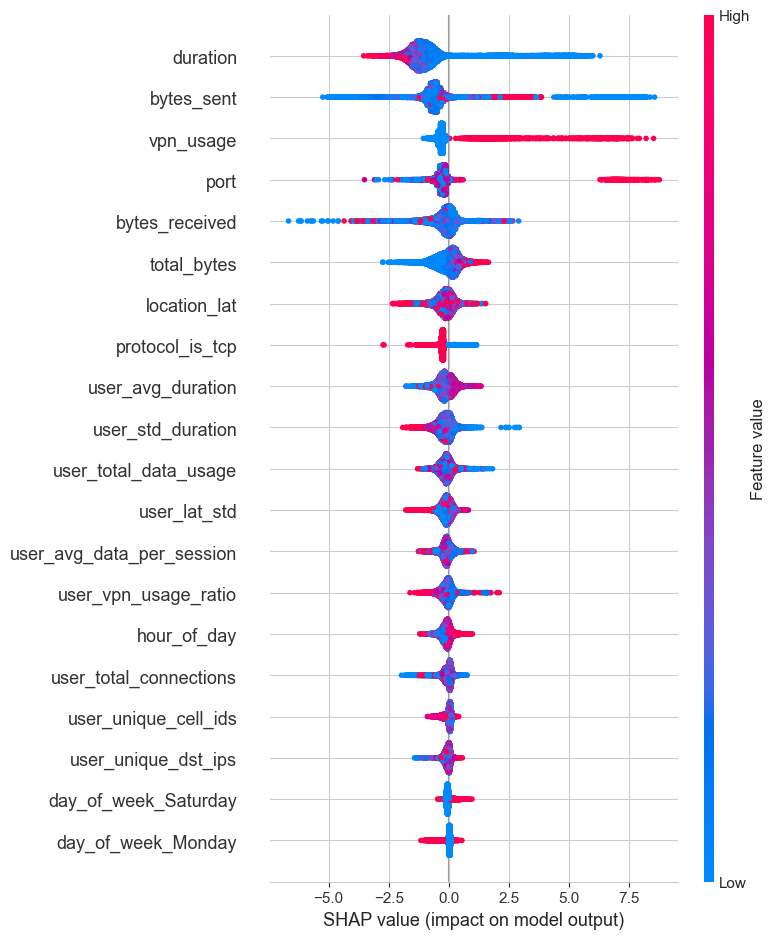


--- Explanation for a Single Correctly Identified Fraud Case ---
Explaining prediction for original index: 72420


In [44]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# This cell assumes your pipeline has been trained and you have all necessary variables
# (model_pipeline_weighted, X_test, y_test, y_pred_weighted, etc.)

# --- Visualize Global Feature Importance ---
print("\n--- Global Feature Importance (SHAP Summary Plot) ---")
print("This plot shows the impact of each feature on the model's output.")
print("Red points indicate a high feature value, blue points a low one.")

# The summary plot is one of the most powerful visualizations in SHAP
# This part of your code is correct.
shap.summary_plot(shap_values, X_test_transformed_df, plot_type="dot")


# --- Visualize a Single Prediction (Force Plot) ---
print("\n--- Explanation for a Single Correctly Identified Fraud Case ---")

# Find the index of the first true fraud case in the test set that the model also predicted as fraud
correct_fraud_indices = y_test[(y_test == 1) & (y_pred_weighted == 1)].index
if len(correct_fraud_indices) > 0:
    # Get the first correct prediction's original index
    target_index = correct_fraud_indices[0]
    
    # Find its integer location in the X_test array
    target_loc = X_test.index.get_loc(target_index)

    print(f"Explaining prediction for original index: {target_index}")

    # --- FIX IS HERE ---
    # We must use the transformed data (X_test_transformed_df) for the feature values
    # to ensure its dimensions match the dimensions of the shap_values.
    display(shap.force_plot(
        explainer.expected_value,
        shap_values.values[target_loc, :],
        X_test_transformed_df.iloc[target_loc, :] # Use the transformed data here
    ))
else:
    print("No correctly identified fraud cases found in the test set to explain.")



In [ ]:
# # --- Visualize a Single Prediction (Force Plot) ---
# print("\n--- Explanation for a Single Correctly Identified Fraud Case ---")

# # Find the index of the first true fraud case in the test set that the model also predicted as fraud
# correct_fraud_indices = y_test[(y_test == 1) & (y_pred_weighted == 1)].index
# if len(correct_fraud_indices) > 0:
#     # Get the first correct prediction's original index
#     target_index = correct_fraud_indices[0]
    
#     # Find its integer location in the X_test array
#     target_loc = X_test.index.get_loc(target_index)

#     print(f"Explaining prediction for original index: {target_index}")

#     # The force plot shows features pushing the prediction higher (red) or lower (blue)
#     display(shap.force_plot(
#         explainer.expected_value,
#         shap_values.values[target_loc, :],
#         X_test.iloc[target_loc, :] # Use original, unscaled data for intuitive display
#     ))
# else:
#     print("No correctly identified fraud cases found in the test set to explain.")


Generating predictions using the trained pipeline...

Model ROC AUC Score: 0.9395


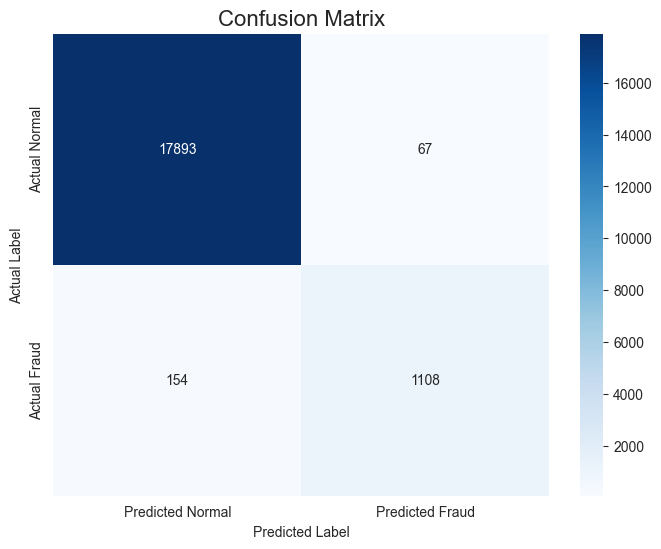


           Detailed Classification Report
              precision    recall  f1-score   support

  Normal (0)       0.99      1.00      0.99     17960
   Fraud (1)       0.94      0.88      0.91      1262

    accuracy                           0.99     19222
   macro avg       0.97      0.94      0.95     19222
weighted avg       0.99      0.99      0.99     19222

Key Metrics Explained:
 - Precision (Fraud): Of all the alerts fired, this percentage was correct. (Measures false alarms)
 - Recall (Fraud): Of all actual fraud, this percentage was caught. (Measures missed fraud)


In [45]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Generate Predictions Using the Full Pipeline ---
# This is the key improvement. The pipeline handles all preprocessing of X_test automatically.
print("Generating predictions using the trained pipeline...")
y_pred = model_pipeline_weighted.predict(X_test)
y_pred_proba = model_pipeline_weighted.predict_proba(X_test)[:, 1] # For AUC score

# --- 2. Calculate and Display Key Metrics ---
# Adding the ROC AUC score provides a more complete picture of model performance.
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nModel ROC AUC Score: {auc_score:.4f}")

# --- 3. Visualize the Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Fraud'],
            yticklabels=['Actual Normal', 'Actual Fraud'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# --- 4. Print the Detailed Classification Report ---
# Your excellent reporting format is preserved here.
print("\n" + "="*60)
print("           Detailed Classification Report")
print("="*60)
report = classification_report(y_test, y_pred, target_names=['Normal (0)', 'Fraud (1)'])
print(report)

print("Key Metrics Explained:")
print(" - Precision (Fraud): Of all the alerts fired, this percentage was correct. (Measures false alarms)")
print(" - Recall (Fraud): Of all actual fraud, this percentage was caught. (Measures missed fraud)")
print("="*60)


In [48]:
import pandas as pd
import shap
import matplotlib.pyplot as plt

# This code assumes you have the following objects already created and trained in your notebook:
# - model_pipeline_weighted: Your final, trained scikit-learn pipeline.
# - X_train: The DataFrame used for training (needed to get the column order).

def predict_and_explain(new_data_point, training_columns):
    """
    Takes a single new data point (as a dictionary), uses the full scikit-learn
    pipeline to process and predict, and then explains the prediction with SHAP.

    Args:
        new_data_point (dict): A dictionary containing all the raw feature values.
        training_columns (pd.Index): The columns from the X_train DataFrame.
    """
    print("--- Starting Prediction and Explanation ---")

    # 1. Convert the new data point into a DataFrame
    # The pipeline expects a DataFrame with the exact same columns as the training data.
    new_df = pd.DataFrame([new_data_point])
    
    # Ensure the column order and presence matches the training data exactly.
    # This is a crucial step for robustness.
    new_df = new_df.reindex(columns=training_columns, fill_value=0)

    # 2. Make a Prediction using the End-to-End Pipeline
    # The pipeline automatically handles all steps: feature selection, scaling,
    # one-hot encoding, and prediction. This is the key simplification.
    print("Step 1: Processing data and making a prediction...")
    prediction = model_pipeline_weighted.predict(new_df)[0]
    prediction_proba = model_pipeline_weighted.predict_proba(new_df)[0]

    # 3. Explain the Prediction with SHAP
    print("Step 2: Explaining the prediction...")
    
    # Extract the fitted classifier and preprocessor from the pipeline
    classifier = model_pipeline_weighted.named_steps['classifier']
    preprocessor = model_pipeline_weighted.named_steps['preprocessor']
    
    # Transform the single data point to get the feature values the model saw
    transformed_data = preprocessor.transform(new_df)
    
    # Reconstruct the final feature names after preprocessing
    numeric_features = preprocessor.transformers_[0][2]
    low_cardinality_categorical_features = preprocessor.transformers_[1][2]
    onehot_encoder = preprocessor.named_transformers_['cat']
    ohe_categories = onehot_encoder.categories_
    ohe_feature_names = []
    for i, col in enumerate(low_cardinality_categorical_features):
        for cat in ohe_categories[i]:
            ohe_feature_names.append(f"{col}_{cat}")
    final_feature_names = list(numeric_features) + ohe_feature_names

    # Create a DataFrame for the transformed data with correct column names
    if hasattr(transformed_data, "toarray"):
        transformed_data_dense = transformed_data.toarray()
    else:
        transformed_data_dense = transformed_data
    transformed_df = pd.DataFrame(transformed_data_dense, columns=final_feature_names)
    
    # Create the SHAP explainer and get values for the single point
    explainer = shap.TreeExplainer(classifier)
    shap_values = explainer(transformed_df)

    # --- Display Results ---
    print("\n" + "="*20 + " PREDICTION RESULT " + "="*20)
    if prediction == 1:
        print(f"Prediction: FRAUD DETECTED (Confidence: {prediction_proba[1]:.2%})")
    else:
        print(f"Prediction: Normal Traffic (Confidence: {prediction_proba[0]:.2%})")
    print("="*59 + "\n")

    print("Explanation (Why did the model make this decision?):")
    # Display the force plot. We use the transformed data to match SHAP's dimensions.
    display(shap.force_plot(
        explainer.expected_value,
        shap_values.values[0, :],
        transformed_df.iloc[0, :]
    ))

# --- Example Usage ---
# Create a sample data point. It MUST contain all the raw features that your
# model was trained on (i.e., all columns in X_train).

# Scenario: A suspicious data point
suspicious_activity = {
    # Original Features
    'port': 4444,
    'duration': 300.5,
    'bytes_sent': 9000000,
    'bytes_received': 50000,
    'vpn_usage': 1, # Use 1 for True
    'location_lat': 55.75,
    'location_lon': 37.61,
    'total_bytes': 9050000,
    'hour_of_day': 2,
    'day_of_week': 'Monday',
    'tld': 'ru',
    'protocol_is_tcp': 0, # Use 0 for UDP
    
    # Engineered User-Level Features (these would be looked up from a database in a real system)
    'user_total_connections': 5,
    'user_unique_dst_ips': 4,
    'user_unique_cell_ids': 2,
    'user_avg_duration': 25.0,
    'user_std_duration': 10.0,
    'user_total_data_usage': 10000000,
    'user_avg_data_per_session': 2000000,
    'user_vpn_sessions': 1,
    'user_lat_std': 0.5,
    'user_lon_std': 0.5,
    'user_vpn_usage_ratio': 0.2,
    
    # Engineered Time-Window Features (also looked up from a database)
    'user_events_last_24h': 50,
    'user_events_last_1h': 25,
    'user_bytes_last_24h': 9500000
}
# --- Scenario 2: A likely normal data point ---

print("\n\n" + "#"*60)
print("### RUNNING A NEW SCENARIO: NORMAL ACTIVITY ###")
print("#"*60 + "\n")

normal_activity = {
    # Original Features
    'port': 443,
    'duration': 25.5,
    'bytes_sent': 5200,
    'bytes_received': 12400,
    'vpn_usage': 0, # Use 0 for False
    'location_lat': 34.05,
    'location_lon': -118.24,
    'total_bytes': 17600,
    'hour_of_day': 14,
    'day_of_week': 'Tuesday',
    'tld': 'com',
    'protocol_is_tcp': 1, # Use 1 for TCP
    
    # Engineered User-Level Features (simulating a typical user)
    'user_total_connections': 85,
    'user_unique_dst_ips': 40,
    'user_unique_cell_ids': 5,
    'user_avg_duration': 30.0,
    'user_std_duration': 15.2,
    'user_total_data_usage': 4500000,
    'user_avg_data_per_session': 52941,
    'user_vpn_sessions': 0,
    'user_lat_std': 0.01,
    'user_lon_std': 0.01,
    'user_vpn_usage_ratio': 0.0,
    
    # Engineered Time-Window Features (simulating low recent activity)
    'user_events_last_24h': 10,
    'user_events_last_1h': 2,
    'user_bytes_last_24h': 500000
}

# Call the function with the new data point and the same training columns
predict_and_explain(normal_activity, X_train.columns)


# Call the function with the new data point and the columns from your training set
predict_and_explain(suspicious_activity, X_train.columns)




############################################################
### RUNNING A NEW SCENARIO: NORMAL ACTIVITY ###
############################################################

--- Starting Prediction and Explanation ---
Step 1: Processing data and making a prediction...
Step 2: Explaining the prediction...

==================== PREDICTION RESULT ====================
Prediction: Normal Traffic (Confidence: 99.99%)

Explanation (Why did the model make this decision?):


--- Starting Prediction and Explanation ---
Step 1: Processing data and making a prediction...
Step 2: Explaining the prediction...

==================== PREDICTION RESULT ====================
Prediction: FRAUD DETECTED (Confidence: 99.47%)

Explanation (Why did the model make this decision?):
